# Modelamiento de Modelos de Machine Learning 

Librerias a utilizar en la creacion de modelos

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

import streamlit as st
import joblib

In [2]:
import tensorflow as tf
#Librerias para redes neuronales(secuencial)
from tensorflow.keras.models import Sequential
#Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
#Optimizador
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

### 1. Leer y unificar las Fuente de Datos

In [65]:
import pandas as pd

# Cargar datos (asegúrate de tener la ruta correcta al archivo CSV)
datos_turno1 = pd.read_csv('datos_turno1_listo_para_analisis.csv', parse_dates=['tiempo_llegada_camion','tiempo_esperando_camion_en_locacion',
                 'tiempo_cuadra_camion', 'tiempo_cuadrado_camion', 'tiempo_cargar_al_camion', 'tiempo_acarreo_camion', 
                 'tiempo_cola_camion_en_zonadescarga', 'tiempo_retroceso_para_descargar',
                 'tiempo_listo_para_descargar', 'tiempo_descarga_camion', 'tiempo_viajando_vacio_locacion','tiempo_inicio_carga_carguio',
                 'tiempo_esperando_carguio','tiempo_previous_esperando_pala',
                  'tiempo_inicio_cambio_estado_camion','tiempo_inicio_cambio_estado_pala'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f%z'))

# Cargar datos (asegúrate de tener la ruta correcta al archivo CSV)
datos_turno2 = pd.read_csv('datos_turno2_listo_para_analisis.csv', parse_dates=['tiempo_llegada_camion','tiempo_esperando_camion_en_locacion',
                 'tiempo_cuadra_camion', 'tiempo_cuadrado_camion', 'tiempo_cargar_al_camion', 'tiempo_acarreo_camion', 
                 'tiempo_cola_camion_en_zonadescarga', 'tiempo_retroceso_para_descargar',
                 'tiempo_listo_para_descargar', 'tiempo_descarga_camion', 'tiempo_viajando_vacio_locacion','tiempo_inicio_carga_carguio',
                 'tiempo_esperando_carguio','tiempo_previous_esperando_pala',
                 'tiempo_inicio_cambio_estado_camion','tiempo_inicio_cambio_estado_pala'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f%z'))

C:\Users\BryanInche-MS4M\AppData\Local\Temp\ipykernel_24468\3478214580.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  datos_turno1 = pd.read_csv('datos_turno1_listo_para_analisis.csv', parse_dates=['tiempo_llegada_camion','tiempo_esperando_camion_en_locacion',
C:\Users\BryanInche-MS4M\AppData\Local\Temp\ipykernel_24468\3478214580.py:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  datos_turno2 = pd.read_csv('datos_turno2_listo_para_analisis.csv', parse_dates=['tiempo_llegada_camion','tiempo_esperando_camion_en_locacion',


In [42]:
# Crear una nueva columna que indique si las fechas son iguales hasta minutos
#datos_turno1['comparacion'] = datos_turno1['tiempo_cuadrado_camion'].dt.floor('min') == datos_turno1['tiempo_inicio_carga_carguio'].dt.floor('min')

# Mostrar el resultado
#print(datos_turno1[['tiempo_cuadrado_camion', 'tiempo_inicio_carga_carguio', 'comparacion']])

In [3]:
#Configuramos pandas para que podamos vizualizar todas las columnas y filas la estadistica descriptiva de todas las variables
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
#Configuramos pandas para que lanze valores con una precision de hasta 6 decimales
pd.set_option('display.float_format', '{:.6f}'.format)

In [67]:
# 1. Recoleccion de fuentes de datos
datos_turno1 = datos_turno1[['tonelaje_inicial_poligono_creado',
'radiohexagonocuchara_equipocarguio',
'capacidad_en_volumen_equipo_carguio_m3',
'capacidad_en_peso_equipo_carguio',
'capacidad_en_peso_equipo_acarreo',
'tiempo_estimado_duracion_estado_pala',
'radio_locacion_metros',
'tiempo_ready_llegada_esperando',
'tiempo_ready_esperando_cuadra',
'tonelaje_camion_antes_cargaestabilizada',
'angulo_giro_promedio_pases', 'tonelaje_segun_computadora',
'id_equipo_camion', 'id_equipo_carguio',
'densidad_inicial_poligono_creado_tn/m3','numero_pases_carguio', 'productividad_operativa_acarreo_tn_h',
'tiempo_llegada_camion',
'tiempo_ready_cuadra_cuadrado',
'tiempo_ready_cuadrado_cargado',
'tiempo_ready_carga_acarreo',
'tiempo_ready_acarreo_cola',
 'tiempo_ready_cola_retro',
 'tiempo_ready_retro_listo',
 'tiempo_ready_listo_descarga',
 'tiempo_ready_descarga_viajandovacio',
 'tiempo_ready_cargando_pala',
 'tiempo_ready_esperando_pala',
'productividad_operativa_carguio_tn_h',
'al_termino_cargar_en_espera_cuadrado_cuadrandose',
'factor',
'capacidad_en_volumen_equipo_acarreo_m3']]

datos_turno2 = datos_turno2[['tonelaje_inicial_poligono_creado',
'radiohexagonocuchara_equipocarguio',
'capacidad_en_volumen_equipo_carguio_m3',
'capacidad_en_peso_equipo_carguio',
'capacidad_en_peso_equipo_acarreo',
'tiempo_estimado_duracion_estado_pala',
'radio_locacion_metros',
'tiempo_ready_llegada_esperando',
'tiempo_ready_esperando_cuadra',
'tonelaje_camion_antes_cargaestabilizada',
'angulo_giro_promedio_pases', 'tonelaje_segun_computadora',
'id_equipo_camion', 'id_equipo_carguio',
'densidad_inicial_poligono_creado_tn/m3','numero_pases_carguio', 'productividad_operativa_acarreo_tn_h',
'tiempo_llegada_camion',
'tiempo_ready_cuadra_cuadrado',
'tiempo_ready_cuadrado_cargado',
'tiempo_ready_carga_acarreo',
'tiempo_ready_acarreo_cola',
 'tiempo_ready_cola_retro',
 'tiempo_ready_retro_listo',
 'tiempo_ready_listo_descarga',
 'tiempo_ready_descarga_viajandovacio',
 'tiempo_ready_cargando_pala',
 'tiempo_ready_esperando_pala',
'productividad_operativa_carguio_tn_h',
'al_termino_cargar_en_espera_cuadrado_cuadrandose',
'factor',
'capacidad_en_volumen_equipo_acarreo_m3']]

# 2. Limpieza y preprocesamiento de datos

#- Redondeamos el valor del tonelaje inicial, a un solo decimal
datos_turno1['tonelaje_inicial_poligono_creado'] = datos_turno1['tonelaje_inicial_poligono_creado'].round(1)
datos_turno2['tonelaje_inicial_poligono_creado'] = datos_turno2['tonelaje_inicial_poligono_creado'].round(1)

#- Convertimos de float a int64 la variable id_equipo_carguio
datos_turno1['id_equipo_carguio'] = datos_turno1['id_equipo_carguio'].round(0).astype('int64')
datos_turno2['id_equipo_carguio'] = datos_turno2['id_equipo_carguio'].round(0).astype('int64')

#- Concatenar dataframes verticalmente
df_resultado = pd.concat([datos_turno1, datos_turno2], ignore_index=True)

#- Guardamos el df en un archivo csv
df_resultado.to_csv('datos_modelo_qwin1_vf.csv', index=False)

Cargamos los datos que utilizaremos para los distintos experimentos del modelo de Ml y Dl

In [75]:
datos = pd.read_csv('datos_modelo_qwin1_vf.csv', parse_dates=['tiempo_llegada_camion'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f%z'))
datos.head(1)

C:\Users\BryanInche-MS4M\AppData\Local\Temp\ipykernel_24468\700419467.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  datos = pd.read_csv('datos_modelo_qwin1_vf.csv', parse_dates=['tiempo_llegada_camion'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f%z'))


,tonelaje_inicial_poligono_creado,radiohexagonocuchara_equipocarguio,capacidad_en_volumen_equipo_carguio_m3,capacidad_en_peso_equipo_carguio,capacidad_en_peso_equipo_acarreo,tiempo_estimado_duracion_estado_pala,radio_locacion_metros,tiempo_ready_llegada_esperando,tiempo_ready_esperando_cuadra,tonelaje_camion_antes_cargaestabilizada,angulo_giro_promedio_pases,tonelaje_segun_computadora,id_equipo_camion,id_equipo_carguio,densidad_inicial_poligono_creado_tn/m3,numero_pases_carguio,productividad_operativa_acarreo_tn_h,tiempo_llegada_camion,tiempo_ready_cuadra_cuadrado,tiempo_ready_cuadrado_cargado,tiempo_ready_carga_acarreo,tiempo_ready_acarreo_cola,tiempo_ready_cola_retro,tiempo_ready_retro_listo,tiempo_ready_listo_descarga,tiempo_ready_descarga_viajandovacio,tiempo_ready_cargando_pala,tiempo_ready_esperando_pala,productividad_operativa_carguio_tn_h,al_termino_cargar_en_espera_cuadrado_cuadrandose,factor,capacidad_en_volumen_equipo_acarreo_m3
0,2242926.000000,680.000000,23.000000,39.158333,229.000000,0.000000,45.000000,0.000000,6.000000,225.800000,0.000000,235.800000,42,74,1.916910,0,1487.645018,2022-01-01 07:01:58.086000-05:00,14.001000,44.008000,160.560000,236.034000,16.001000,12.002000,46.004000,36.010000,160.560000,229.177000,2178.084195,False,1042,129.000000


### 3. Seleccion de Variables

3.1 Seleccion con StatModels, para regresion lineal (variables significativas estadisticamente)

In [48]:
import pandas as pd
import statsmodels.api as sm

# Supongamos que datos es tu DataFrame y has seleccionado tus características (X) y variable objetivo (y)
X = datos[['tonelaje_inicial_poligono_creado','radiohexagonocuchara_equipocarguio',
'capacidad_en_volumen_equipo_carguio_m3',
'capacidad_en_peso_equipo_carguio',
'capacidad_en_peso_equipo_acarreo',
'tiempo_estimado_duracion_estado_pala',
'radio_locacion_metros',
'tiempo_ready_llegada_esperando',
'tiempo_ready_esperando_cuadra',
'tonelaje_camion_antes_cargaestabilizada',
'angulo_giro_promedio_pases', 'tonelaje_segun_computadora',
'id_equipo_camion', 'id_equipo_carguio',
'densidad_inicial_poligono_creado_tn/m3']]  # Reemplaza 'feature1', 'feature2', 'feature3' con tus nombres de características
y = datos['numero_pases_carguio'] # Reemplaza 'variable_objetivo' con el nombre de tu variable objetivo

# Añadir constante a las características (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal con statsmodels
modelo = sm.OLS(y, X).fit()

# Imprimir un resumen estadistico del modelo
print(modelo.summary())

                             OLS Regression Results                             
Dep. Variable:     numero_pases_carguio   R-squared:                       0.576
Model:                              OLS   Adj. R-squared:                  0.576
Method:                   Least Squares   F-statistic:                 7.227e+04
Date:                  Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                          16:04:49   Log-Likelihood:            -1.3676e+06
No. Observations:                743993   AIC:                         2.735e+06
Df Residuals:                    743978   BIC:                         2.736e+06
Df Model:                            14                                         
Covariance Type:              nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

- El aumento de una unidad en 'radiohexagonocuchara_equipocarguio' se asocia, en promedio, con un aumento estimado de 0.0050 unidades en el 'Numero de pases' (y), manteniendo constantes todas las demás variables en el modelo.

- El aumento de una unidad en 'capacidad_en_volumen_equipo_carguio_m3' se asocia, en promedio, con una disminución estimada de 0.6688 unidades  en el 'Numero de pases' (y), manteniendo constantes todas las demás variables en el modelo.

## Seccion: de Modelos con Valores Atipicos

### 3. Modelos de ML y DL con Valores atipicos

Variables general, con las Productividades, para que podamos medir el impacto del modelo

In [6]:
# Supongamos que datos es tu DataFrame y has seleccionado tus características (X) y variable objetivo (y)
X_gen = datos[['tonelaje_inicial_poligono_creado','radiohexagonocuchara_equipocarguio',
'capacidad_en_volumen_equipo_carguio_m3',
'capacidad_en_peso_equipo_carguio',
'capacidad_en_peso_equipo_acarreo',
'tiempo_estimado_duracion_estado_pala',
'radio_locacion_metros',
'tiempo_ready_llegada_esperando',
'tiempo_ready_esperando_cuadra',
'tonelaje_camion_antes_cargaestabilizada',
'angulo_giro_promedio_pases', 'tonelaje_segun_computadora',
'id_equipo_camion', 'id_equipo_carguio',
'densidad_inicial_poligono_creado_tn/m3', 'productividad_operativa_acarreo_tn_h',
'tiempo_ready_cuadra_cuadrado',
'tiempo_ready_cuadrado_cargado',
'tiempo_ready_carga_acarreo',
'tiempo_ready_acarreo_cola',
 'tiempo_ready_cola_retro',
 'tiempo_ready_retro_listo',
 'tiempo_ready_listo_descarga',
 'tiempo_ready_descarga_viajandovacio',
 'tiempo_ready_cargando_pala',
 'tiempo_ready_esperando_pala',
'productividad_operativa_carguio_tn_h']]  # Reemplaza 'feature1', 'feature2', 'feature3' con tus nombres de características
y_gen = datos['numero_pases_carguio'] # Reemplaza 'variable_objetivo' con el nombre de tu variable objetivo

In [7]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_gen, y_gen, test_size=0.2, random_state=42)

Hacemos la division entre las variables que seran independientes, y la variable target(dependiente) para los Modelos

Variable Utilizadas en el modelo

In [8]:
# Supongamos que datos es tu DataFrame y has seleccionado tus características (X) y variable objetivo (y)
X = datos[['tonelaje_inicial_poligono_creado',
'radiohexagonocuchara_equipocarguio',
'capacidad_en_volumen_equipo_carguio_m3',
#'capacidad_en_peso_equipo_carguio',
#'capacidad_en_peso_equipo_acarreo',
'tiempo_estimado_duracion_estado_pala',
'radio_locacion_metros',
'tiempo_ready_llegada_esperando',
'tiempo_ready_esperando_cuadra',
'tonelaje_camion_antes_cargaestabilizada',
'angulo_giro_promedio_pases',
'tonelaje_segun_computadora',
#'id_equipo_camion', 'id_equipo_carguio',
'densidad_inicial_poligono_creado_tn/m3']]  # Reemplaza 'feature1', 'feature2', 'feature3' con tus nombres de características
y = datos['numero_pases_carguio'] # Reemplaza 'variable_objetivo' con el nombre de tu variable objetivo

3.1 Regresion Lineal

In [9]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal múltiple
modelo_rl = LinearRegression()

# Entrenar el modelo
modelo_rl.fit(X_train_rl, y_train_rl)

# Realizar predicciones en el conjunto de prueba
y_pred_rl = modelo_rl.predict(X_test_rl)

# Redondear los valores de y_pred al entero más cercano
y_pred_rl = np.round(y_pred_rl).astype('int64')

# Medir el rendimiento del modelo
error_absoluto_medio_rl = metrics.mean_absolute_error(y_test_rl, y_pred_rl)
error_cuadratico_medio_rl = metrics.mean_squared_error(y_test_rl, y_pred_rl)
raiz_error_cuadratico_medio_rl = metrics.mean_squared_error(y_test_rl, y_pred_rl, squared=False)
coeficiente_de_determinacion_rl = metrics.r2_score(y_test_rl, y_pred_rl)

# Imprimir métricas de rendimiento
print(f'Error Absoluto Medio: {error_absoluto_medio_rl}')
print(f'Error Cuadrático Medio: {error_cuadratico_medio_rl}')
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_rl}')
print(f'Coeficiente de Determinación (R^2): {coeficiente_de_determinacion_rl}')

Error Absoluto Medio: 1.0690596038951874
Error Cuadrático Medio: 2.4710985960927156
Raíz del Error Cuadrático Medio: 1.571972835672651
Coeficiente de Determinación (R^2): 0.5471974258685701


Un RMSE de 1.52 significa que, en promedio, las predicciones tienen un error de alrededor de 1.52 unidades  de nuemro de pases.

Crear un gráfico de valores reales vs predichos

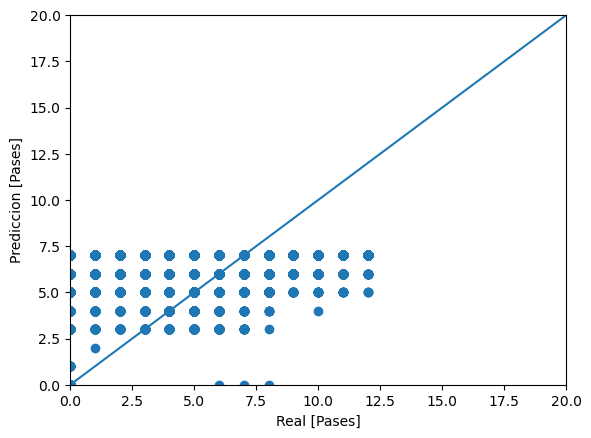

In [10]:
# Visualizar las predicciones
plt.scatter(y_test_rl, y_pred_rl)
plt.xlabel('Real [Pases]')
plt.ylabel('Prediccion [Pases]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

3.2 Arbol de decision Regressor

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supongamos que X es tu conjunto de características y y es tu variable objetivo (Número de Pases)
# Asegúrate de tener definidas estas variables antes de ejecutar el código

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión para regresión
model_arbol = DecisionTreeRegressor(max_depth=5,random_state=42)

# Entrenar el modelo
model_arbol.fit(X_train_dt, y_train_dt)

# Realizar predicciones en el conjunto de prueba
y_pred_dt = model_arbol.predict(X_test_dt)

# Redondear los valores de y_pred al entero más cercano
y_pred_dt = np.round(y_pred_dt).astype('int64')

# Visualizar el árbol de decisión (opcional)
# Nota: Necesitarás tener instalada la biblioteca graphviz y pydotplus para esto
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = export_graphviz(modelo_arbol, out_file=None, feature_names=X.columns, filled=True, rounded=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('arbol_decision.png')

# Medir el rendimiento del modelo
error_absoluto_medio_dt = metrics.mean_absolute_error(y_test_dt, y_pred_dt)
error_cuadratico_medio_dt = metrics.mean_squared_error(y_test_dt, y_pred_dt)
raiz_error_cuadratico_medio_dt = metrics.mean_squared_error(y_test_dt, y_pred_dt, squared=False)

# Imprimir métricas de rendimiento
print(f'Error Absoluto Medio: {error_absoluto_medio_dt}')
print(f'Error Cuadrático Medio: {error_cuadratico_medio_dt}')
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_dt}')

Error Absoluto Medio: 0.9135478061008474
Error Cuadrático Medio: 1.9104227850993623
Raíz del Error Cuadrático Medio: 1.3821804459256983


Extraer mediante el metodo de envoltura las "Variables mas importantes para el modelo"

In [12]:
# Obtener las importancias de las características
feature_importances_dt = model_arbol.feature_importances_

# Crear un DataFrame para mostrar las importancias de las características junto con sus nombres
feature_importance_df_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_dt
})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

# Mostrar las 10 características más importantes
print(feature_importance_df_dt.head(15))

                                    Feature  Importance
8                angulo_giro_promedio_pases    0.890953
1        radiohexagonocuchara_equipocarguio    0.087662
10   densidad_inicial_poligono_creado_tn/m3    0.013155
6             tiempo_ready_esperando_cuadra    0.006435
0          tonelaje_inicial_poligono_creado    0.001474
2    capacidad_en_volumen_equipo_carguio_m3    0.000162
4                     radio_locacion_metros    0.000158
9                tonelaje_segun_computadora    0.000001
3      tiempo_estimado_duracion_estado_pala    0.000000
5            tiempo_ready_llegada_esperando    0.000000
7   tonelaje_camion_antes_cargaestabilizada    0.000000


3.3 Random Forest 

Construye cada árbol de forma independiente y paralela. Cada árbol no tiene conocimiento de la existencia de otros árboles.

In [13]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df con tus datos, y la columna objetivo es 'target'
# Asegúrate de tener las características adecuadas para entrenar el modelo

# Dividir el conjunto de datos en entrenamiento y prueba
# Dividir el conjunto de datos en entrenamiento y prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=20, max_depth=5 ,random_state=42)

# Entrenar el modelo
model_rf.fit(X_train_rf, y_train_rf)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test_rf)

# Redondear los valores de y_pred al entero más cercano
y_pred_rf = np.round(y_pred_rf).astype('int64')

# Medir el rendimiento del modelo
error_absoluto_medio_rf = metrics.mean_absolute_error(y_test_rf, y_pred_rf)
error_cuadratico_medio_rf = metrics.mean_squared_error(y_test_rf, y_pred_rf)
raiz_error_cuadratico_medio_rf = metrics.mean_squared_error(y_test_rf, y_pred_rf, squared=False)

# Imprimir métricas de rendimiento
print(f'Error Absoluto Medio: {error_absoluto_medio_rf}')
print(f'Error Cuadrático Medio: {error_cuadratico_medio_rf}')
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_rf}')

Error Absoluto Medio: 0.910886497893131
Error Cuadrático Medio: 1.903070585151782
Raíz del Error Cuadrático Medio: 1.3795182438633358


Extraer mediante el metodo de envoltura las "Variables mas importantes para el modelo"

In [14]:
# Obtener las importancias de las características
feature_importances_rf = model_rf.feature_importances_

# Crear un DataFrame para mostrar las importancias de las características junto con sus nombres
feature_importance_df_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_rf
})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Mostrar las 10 características más importantes
print(feature_importance_df_rf.head(15))

                                    Feature  Importance
8                angulo_giro_promedio_pases    0.890684
1        radiohexagonocuchara_equipocarguio    0.087352
10   densidad_inicial_poligono_creado_tn/m3    0.012972
6             tiempo_ready_esperando_cuadra    0.006484
0          tonelaje_inicial_poligono_creado    0.001607
7   tonelaje_camion_antes_cargaestabilizada    0.000678
4                     radio_locacion_metros    0.000154
2    capacidad_en_volumen_equipo_carguio_m3    0.000051
9                tonelaje_segun_computadora    0.000012
5            tiempo_ready_llegada_esperando    0.000004
3      tiempo_estimado_duracion_estado_pala    0.000002


3.4 SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVR

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de SVM Regressor
model_svm = SVR(kernel='linear')  # Puedes ajustar los hiperparámetros según sea necesario
model_svm.fit(X_train_svm, y_train_svm)

# Realizar predicciones en el conjunto de prueba con SVM Regressor
y_pred_svm = model_svm.predict(X_test_svm)
y_pred_svm = np.round(y_pred_svm).astype('int64')

# Medir el rendimiento del modelo de SVM Regressor
error_absoluto_medio_svm = metrics.mean_absolute_error(y_test_svm, y_pred_svm)
error_cuadratico_medio_svm = metrics.mean_squared_error(y_test_svm, y_pred_svm)
raiz_error_cuadratico_medio_svm = metrics.mean_squared_error(y_test_svm, y_pred_svm, squared=False)

# Imprimir métricas de rendimiento de SVM Regressor
print("\nMétricas de rendimiento para SVM Regressor:")
print(f'Error Absoluto Medio: {error_absoluto_medio_svm}')
print(f'Error Cuadrático Medio: {error_cuadratico_medio_svm}')
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_svm}')

3.5 XGBoost: 

Construye árboles de manera secuencial. Cada árbol se entrena para corregir los errores de los árboles anteriores.

In [15]:
# Instalar las bibliotecas necesarias
# pip install xgboost scikit-learn matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df con tus datos, y la columna objetivo es 'target'
# Asegúrate de tener las características adecuadas para entrenar el modelo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de XGBoost
model_xgb = xgb.XGBRegressor(
    n_estimators=20,  # Número de árboles
    max_depth=5,  # Profundidad máxima de los árboles
    random_state=42
)

# Entrenar el modelo
model_xgb.fit(X_train_xgb, y_train_xgb)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = model_xgb.predict(X_test_xgb)

# Redondear los valores de y_pred al entero más cercano
y_pred_xgb = np.round(y_pred_xgb).astype('int64')

# Medir el rendimiento del modelo
error_absoluto_medio_xgb = metrics.mean_absolute_error(y_test_xgb, y_pred_xgb)
error_cuadratico_medio_xgb = metrics.mean_squared_error(y_test_xgb, y_pred_xgb)
raiz_error_cuadratico_medio_xgb = metrics.mean_squared_error(y_test_xgb, y_pred_xgb, squared=False)

# Imprimir métricas de rendimiento
print(f'Error Absoluto Medio: {error_absoluto_medio_xgb}')
print(f'Error Cuadrático Medio: {error_cuadratico_medio_xgb}')
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_xgb}')

Error Absoluto Medio: 0.8673109362294101
Error Cuadrático Medio: 1.7641986841309418
Raíz del Error Cuadrático Medio: 1.3282314121157284


Extraer mediante el metodo de envoltura las "Variables mas importantes para el modelo"

In [16]:
# Obtener las importancias de las características
feature_importances_xgb = model_xgb.feature_importances_

# Crear un DataFrame para mostrar las importancias de las características junto con sus nombres
feature_importance_df_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_xgb
})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Mostrar las 10 características más importantes
print(feature_importance_df_xgb.head(15))

                                    Feature  Importance
8                angulo_giro_promedio_pases    0.693857
1        radiohexagonocuchara_equipocarguio    0.234301
7   tonelaje_camion_antes_cargaestabilizada    0.015582
10   densidad_inicial_poligono_creado_tn/m3    0.015534
6             tiempo_ready_esperando_cuadra    0.014090
3      tiempo_estimado_duracion_estado_pala    0.006328
9                tonelaje_segun_computadora    0.006077
4                     radio_locacion_metros    0.005397
0          tonelaje_inicial_poligono_creado    0.005074
5            tiempo_ready_llegada_esperando    0.002309
2    capacidad_en_volumen_equipo_carguio_m3    0.001453


3.6 Red Neuronal

In [17]:
# Aseguramos que los resultados sean "reproducibles" en cada ejecucion de tensorflow(pesos iniciales aleatorios)
import tensorflow as tf
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

3.6.1 Red Neuronal Recurrente

In [35]:
'''
from sklearn.preprocessing import StandardScaler

# Suponiendo que tienes tus datos X e y definidos antes de esta sección

# Normalizar los datos
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Crear el modelo de la red neuronal
model_rnn = Sequential()
model_rnn.add(Dense(30, input_dim=15, activation='relu')) #input_dim : numero de variables inputs
model_rnn.add(Dense(60,activation='relu'))
model_rnn.add(Dense(30,activation='relu'))
model_rnn.add(Dense(1, activation='linear'))


# Compilar el modelo con la metrica de error, y el optimizador
model_rnn.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model_rnn.fit(X_train_rnn, y_train_rnn, epochs=10, batch_size=5, verbose=1)

# Hacer predicciones en el conjunto de prueba
y_pred_rnn = model_rnn.predict(X_test_rnn)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test_rnn, y_pred_rnn)
# Calcular la raíz cuadrada del error cuadrático medio
rmse = np.sqrt(mse)

print(f'Raíz del Error Cuadrático Medio en el conjunto de prueba: {rmse}')
'''

"\nfrom sklearn.preprocessing import StandardScaler\n\n# Suponiendo que tienes tus datos X e y definidos antes de esta sección\n\n# Normalizar los datos\nscaler = StandardScaler()\nX_normalized = scaler.fit_transform(X)\n\n# Dividir los datos en conjuntos de entrenamiento y prueba\nX_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_normalized, y, test_size=0.2, random_state=42)\n\n# Crear el modelo de la red neuronal\nmodel_rnn = Sequential()\nmodel_rnn.add(Dense(30, input_dim=15, activation='relu')) #input_dim : numero de variables inputs\nmodel_rnn.add(Dense(60,activation='relu'))\nmodel_rnn.add(Dense(30,activation='relu'))\nmodel_rnn.add(Dense(1, activation='linear'))\n\n\n# Compilar el modelo con la metrica de error, y el optimizador\nmodel_rnn.compile(loss='mean_squared_error', optimizer='adam')\n\n# Entrenar el modelo\nmodel_rnn.fit(X_train_rnn, y_train_rnn, epochs=10, batch_size=5, verbose=1)\n\n# Hacer predicciones en el conjunto de prueba\ny_pred_rnn = model

3.6.2 Red Neuronal LSTM

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np

# Normalizar los datos, para que la red tenga un mejor rendimiento al procesar datos mas pequenos y en una misma escala
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convertir DataFrame a array de NumPy
X_array = X_normalized
y_array = y.values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

#---------------------------------------------------------------------------------------------------------------------------------------
model_rnn = Sequential()
# La forma de entrada para LSTM debe ser (n_timesteps, n_features)
model_rnn.add(LSTM(30, activation='relu', input_shape=(1, 11)))  # Cambié (1, 1) a (1, 15) para que coincida con tus datos de entrada
# Agregar capas Dense según sea necesario
model_rnn.add(Dense(60, activation='relu'))
model_rnn.add(Dense(30, activation='relu'))
model_rnn.add(Dense(15, activation='relu'))
# Capa de salida
model_rnn.add(Dense(1, activation='linear'))
#-------------------------------------------------------------------------------------------------------------------------------------------

# Compilar el modelo
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
# Imprimir un resumen del modelo
model_rnn.summary()

# Entrenar el modelo
#X_train_rnn.reshape(-1, 1, 1) significa que quieres que NumPy calcule automáticamente el tamaño de la dimensión correspondiente a n_samples
#Si tienes 15 variables en cada paso de tiempo, entonces la forma de entrada para la capa LSTM debería ser (n_samples, n_timesteps, n_features). 
#En este caso, la dimensión n_features debería ser 15
model_rnn.fit(X_train_rnn.reshape(-1, 1, 11), y_train_rnn, epochs=20, batch_size=5, verbose=1) # (n_samples, n_pasos, n_variables)

# Hacer predicciones en el conjunto de prueba
y_pred_rnn = model_rnn.predict(X_test_rnn.reshape(-1, 1, 11)) # (n_samples, n_pasos, n_variables)

# Redondear los valores de y_pred al entero más cercano
y_pred_rnn = np.round(y_pred_rnn).astype('int64')

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test_rnn, y_pred_rnn)
# Calcular la raíz cuadrada del error cuadrático medio
rmse = np.sqrt(mse)

print(f'Raíz del Error Cuadrático Medio en el conjunto de prueba: {rmse}')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                5040      
                                                                 
 dense (Dense)               (None, 60)                1860      
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 9211 (35.98 KB)
Trainable params: 9211 (35.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20

119039/1

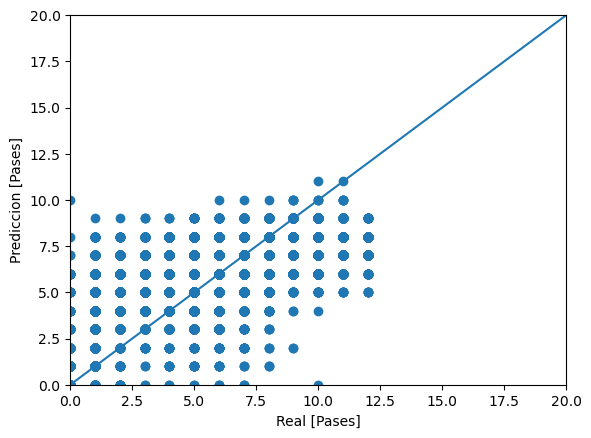

In [19]:
# Visualizar las predicciones
plt.scatter(y_test_rnn, y_pred_rnn)
plt.xlabel('Real [Pases]')
plt.ylabel('Prediccion [Pases]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

### 4. Armando los BaseFinal, con los valores predichos de cada Modelo, y tambien medir el impacto con productividades

In [20]:
# Agregar las predicciones como una columna adicional al conjunto de prueba
df_resultados_models = X_test_gen.copy()
df_resultados_models['Numero_pases_real'] = y_test_gen
df_resultados_models['Numero_pases_reglineal'] = y_pred_rl
df_resultados_models['Numero_pases_arboldecision'] = y_pred_dt
df_resultados_models['Numero_pases_rforest'] = y_pred_rf
df_resultados_models['Numero_pases_xgb'] = y_pred_xgb
df_resultados_models['Numero_pases_rnn'] = y_pred_rnn

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Aumento o disminucion de pases con respecto a la prediccion del modelo
m = 1 # aumento
n = 1 # disminuye

# Regresion Lineal
df_resultados_models['Numero_pases_reglineal+1'] = df_resultados_models['Numero_pases_reglineal'] + m
df_resultados_models['Numero_pases_reglineal-1'] = df_resultados_models['Numero_pases_reglineal'] - n

# Arbol de decision Regressor
df_resultados_models['Numero_pases_arboldecision+1'] = df_resultados_models['Numero_pases_arboldecision'] + m
df_resultados_models['Numero_pases_arboldecision-1'] = df_resultados_models['Numero_pases_arboldecision'] - n

# Random Forest
df_resultados_models['Numero_pases_rforest+1'] = df_resultados_models['Numero_pases_rforest'] + m
df_resultados_models['Numero_pases_rforest-1'] = df_resultados_models['Numero_pases_rforest'] - n

# XGB
df_resultados_models['Numero_pases_xgb+1'] = df_resultados_models['Numero_pases_xgb'] + m
df_resultados_models['Numero_pases_xgb-1'] = df_resultados_models['Numero_pases_xgb'] - n

# Redes Neuronales LSTM
df_resultados_models['Numero_pases_rnn+1'] = df_resultados_models['Numero_pases_rnn'] + m
df_resultados_models['Numero_pases_rnn-1'] = df_resultados_models['Numero_pases_rnn'] - n


#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Regresion Lineal
df_resultados_models['Diferencia_Pases_rl'] = df_resultados_models['Numero_pases_reglineal'] - df_resultados_models['Numero_pases_real']
df_resultados_models['tonelaje_segun_computadora_rl'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_rl']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# Regresion Lineal + 1
df_resultados_models['Diferencia_Pases_rl+1'] = df_resultados_models['Numero_pases_reglineal+1'] - df_resultados_models['Numero_pases_reglineal']
df_resultados_models['tonelaje_segun_computadora_rl+1'] = (df_resultados_models['tonelaje_segun_computadora_rl']) + (df_resultados_models['Diferencia_Pases_rl+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# Regresion Lineal - 1
df_resultados_models['Diferencia_Pases_rl-1'] = df_resultados_models['Numero_pases_reglineal-1'] - df_resultados_models['Numero_pases_reglineal']
df_resultados_models['tonelaje_segun_computadora_rl-1'] = (df_resultados_models['tonelaje_segun_computadora_rl']) + (df_resultados_models['Diferencia_Pases_rl-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

#Arbol de decision
df_resultados_models['Diferencia_Pases_dt'] = df_resultados_models['Numero_pases_arboldecision'] - df_resultados_models['Numero_pases_real']
df_resultados_models['tonelaje_segun_computadora_dt'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_dt']*df_resultados_models['capacidad_en_peso_equipo_carguio'])


# Arbol de decision + 1
df_resultados_models['Diferencia_Pases_dt+1'] = df_resultados_models['Numero_pases_arboldecision+1'] - df_resultados_models['Numero_pases_arboldecision']
df_resultados_models['tonelaje_segun_computadora_dt+1'] = (df_resultados_models['tonelaje_segun_computadora_dt']) + (df_resultados_models['Diferencia_Pases_dt+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# Arbol de decision - 1
df_resultados_models['Diferencia_Pases_dt-1'] = df_resultados_models['Numero_pases_arboldecision-1'] - df_resultados_models['Numero_pases_arboldecision']
df_resultados_models['tonelaje_segun_computadora_dt-1'] = (df_resultados_models['tonelaje_segun_computadora_dt']) + (df_resultados_models['Diferencia_Pases_dt-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# Random Forest 
df_resultados_models['Diferencia_Pases_rf'] = df_resultados_models['Numero_pases_rforest'] - df_resultados_models['Numero_pases_real']
df_resultados_models['tonelaje_segun_computadora_rf'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_rf']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# Random Forest  + 1
df_resultados_models['Diferencia_Pases_rf+1'] = df_resultados_models['Numero_pases_rforest+1'] - df_resultados_models['Numero_pases_rforest']
df_resultados_models['tonelaje_segun_computadora_rf+1'] = (df_resultados_models['tonelaje_segun_computadora_rf']) + (df_resultados_models['Diferencia_Pases_rf+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# Random Forest  - 1
df_resultados_models['Diferencia_Pases_rf-1'] = df_resultados_models['Numero_pases_rforest-1'] - df_resultados_models['Numero_pases_rforest']
df_resultados_models['tonelaje_segun_computadora_rf-1'] = (df_resultados_models['tonelaje_segun_computadora_rf']) + (df_resultados_models['Diferencia_Pases_rf-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# XGB (eXtreme Gradient Boosting)
df_resultados_models['Diferencia_Pases_xgb'] = df_resultados_models['Numero_pases_xgb'] - df_resultados_models['Numero_pases_real']
df_resultados_models['tonelaje_segun_computadora_xgb'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_xgb']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# XGB  + 1
df_resultados_models['Diferencia_Pases_xgb+1'] = df_resultados_models['Numero_pases_xgb+1'] - df_resultados_models['Numero_pases_xgb']
df_resultados_models['tonelaje_segun_computadora_xgb+1'] = (df_resultados_models['tonelaje_segun_computadora_xgb']) + (df_resultados_models['Diferencia_Pases_xgb+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# XGB - 1
df_resultados_models['Diferencia_Pases_xgb-1'] = df_resultados_models['Numero_pases_xgb-1'] - df_resultados_models['Numero_pases_xgb']
df_resultados_models['tonelaje_segun_computadora_xgb-1'] = (df_resultados_models['tonelaje_segun_computadora_xgb']) + (df_resultados_models['Diferencia_Pases_xgb-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# RNN (Redes Neuronales LSTM)
df_resultados_models['Diferencia_Pases_rnn'] = df_resultados_models['Numero_pases_rnn'] - df_resultados_models['Numero_pases_real']
df_resultados_models['tonelaje_segun_computadora_rnn'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_rnn']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# RNN  + 1
df_resultados_models['Diferencia_Pases_rnn+1'] = df_resultados_models['Numero_pases_rnn+1'] - df_resultados_models['Numero_pases_rnn']
df_resultados_models['tonelaje_segun_computadora_rnn+1'] = (df_resultados_models['tonelaje_segun_computadora_rnn']) + (df_resultados_models['Diferencia_Pases_rnn+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# RNN - 1
df_resultados_models['Diferencia_Pases_rnn-1'] = df_resultados_models['Numero_pases_rnn-1'] - df_resultados_models['Numero_pases_rnn']
df_resultados_models['tonelaje_segun_computadora_rnn-1'] = (df_resultados_models['tonelaje_segun_computadora_rnn']) + (df_resultados_models['Diferencia_Pases_rnn-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Hallamos el tiempo ready de cargando de la pala, en cada pase, para que se simule, si incrementa o disminuye pases(en base al modelo)
df_resultados_models['tiempo_ready_cargando_pala_por_pase'] = np.where(df_resultados_models['Numero_pases_real'] == 0, 0, df_resultados_models['tiempo_ready_cargando_pala'] / df_resultados_models['Numero_pases_real'])
df_resultados_models['tiempo_ready_cargando_pala_rl+1'] = df_resultados_models['tiempo_ready_cargando_pala'] + df_resultados_models['tiempo_ready_cargando_pala_por_pase']
df_resultados_models['tiempo_ready_cargando_pala_rl-1'] = df_resultados_models['tiempo_ready_cargando_pala'] - df_resultados_models['tiempo_ready_cargando_pala_por_pase']

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

df_resultados_models.head(10)

,tonelaje_inicial_poligono_creado,radiohexagonocuchara_equipocarguio,capacidad_en_volumen_equipo_carguio_m3,capacidad_en_peso_equipo_carguio,capacidad_en_peso_equipo_acarreo,tiempo_estimado_duracion_estado_pala,radio_locacion_metros,tiempo_ready_llegada_esperando,tiempo_ready_esperando_cuadra,tonelaje_camion_antes_cargaestabilizada,angulo_giro_promedio_pases,tonelaje_segun_computadora,id_equipo_camion,id_equipo_carguio,densidad_inicial_poligono_creado_tn/m3,productividad_operativa_acarreo_tn_h,tiempo_ready_cuadra_cuadrado,tiempo_ready_cuadrado_cargado,tiempo_ready_carga_acarreo,tiempo_ready_acarreo_cola,tiempo_ready_cola_retro,tiempo_ready_retro_listo,tiempo_ready_listo_descarga,tiempo_ready_descarga_viajandovacio,tiempo_ready_cargando_pala,tiempo_ready_esperando_pala,productividad_operativa_carguio_tn_h,Numero_pases_real,Numero_pases_reglineal,Numero_pases_arboldecision,Numero_pases_rforest,Numero_pases_xgb,Numero_pases_rnn,Numero_pases_reglineal+1,Numero_pases_reglineal-1,Numero_pases_arboldecision+1,Numero_pases_arboldecision-1,Numero_pases_rforest+1,Numero_pases_rforest-1,Numero_pases_xgb+1,Numero_pases_xgb-1,Numero_pases_rnn+1,Numero_pases_rnn-1,Diferencia_Pases_rl,tonelaje_segun_computadora_rl,Diferencia_Pases_rl+1,tonelaje_segun_computadora_rl+1,Diferencia_Pases_rl-1,tonelaje_segun_computadora_rl-1,Diferencia_Pases_dt,tonelaje_segun_computadora_dt,Diferencia_Pases_dt+1,tonelaje_segun_computadora_dt+1,Diferencia_Pases_dt-1,tonelaje_segun_computadora_dt-1,Diferencia_Pases_rf,tonelaje_segun_computadora_rf,Diferencia_Pases_rf+1,tonelaje_segun_computadora_rf+1,Diferencia_Pases_rf-1,tonelaje_segun_computadora_rf-1,Diferencia_Pases_xgb,tonelaje_segun_computadora_xgb,Diferencia_Pases_xgb+1,tonelaje_segun_computadora_xgb+1,Diferencia_Pases_xgb-1,tonelaje_segun_computadora_xgb-1,Diferencia_Pases_rnn,tonelaje_segun_computadora_rnn,Diferencia_Pases_rnn+1,tonelaje_segun_computadora_rnn+1,Diferencia_Pases_rnn-1,tonelaje_segun_computadora_rnn-1,tiempo_ready_cargando_pala_por_pase,tiempo_ready_cargando_pala_rl+1,tiempo_ready_cargando_pala_rl-1
247928,614471.900000,300.000000,27.000000,45.000000,229.000000,0.000000,50.000000,368.530000,561.629000,213.400000,38.000000,213.400000,53,69,2.693000,429.115795,10.000000,42.007000,180.040000,520.072000,10.000000,19.999000,12.000000,66.009000,180.040000,397.152000,1330.995579,6,5,5,5,6,6,6,4,6,4,6,4,7,5,7,5,-1,168.400000,1,213.400000,-1,123.400000,-1,168.400000,1,213.400000,-1,123.400000,-1,168.400000,1,213.400000,-1,123.400000,0,213.400000,1,258.400000,-1,168.400000,0,213.400000,1,258.400000,-1,168.400000,30.006667,210.046667,150.033333
504709,259052.600000,300.000000,27.000000,45.000000,229.000000,0.000000,35.000000,297.677001,0.000000,218.500000,51.000000,229.400000,45,69,2.711000,876.893623,36.005000,96.016000,118.019000,320.055000,4.000000,14.000000,12.002000,44.005000,118.019000,42.629000,5140.680245,5,5,6,6,6,6,6,4,7,5,7,5,7,5,7,5,0,229.400000,1,274.400000,-1,184.400000,1,274.400000,1,319.400000,-1,229.400000,1,274.400000,1,319.400000,-1,229.400000,1,274.400000,1,319.400000,-1,229.400000,1,274.400000,1,319.400000,-1,229.400000,23.603800,141.622800,94.415200
64148,137479.800000,300.000000,27.000000,45.000000,229.000000,300.000000,28.000000,83.345025,16.123000,241.100000,47.000000,240.600000,34,70,2.793000,706.713421,20.002000,34.004000,106.012000,868.122000,2.000000,18.000000,14.000000,64.009000,106.012000,70.129000,4917.424109,6,5,5,5,6,6,6,4,6,4,6,4,7,5,7,5,-1,195.600000,1,240.600000,-1,150.600000,-1,195.600000,1,240.600000,-1,150.600000,-1,195.600000,1,240.600000,-1,150.600000,0,240.600000,1,285.600000,-1,195.600000,0,240.600000,1,285.600000,-1,195.600000,17.668667,123.680667,88.343333
704913,524056.500000,300.000000,27.000000,45.000000,229.000000,0.000000,55.000000,80.118000,0.000000,240.900000,84.000000,240.900000,40,69,2.707000,685.973005,11.898000,204.044000,198.037000,656.132000,2.000000,70.016000,0.000000,42.003000,198.037000,67.832000,3261.907180,7,6,6,6,6,6,7,5,7,5,7,5,7,5,7,5,-

Agregamos las Productividades, si se hubiesen utilizados los Modelos 

#### **Acarreo**

In [21]:
# Asegurarse de que el denominador no sea cero
denominador_acarreo = (df_resultados_models['tiempo_ready_llegada_esperando'] +
               df_resultados_models['tiempo_ready_esperando_cuadra'] +
               df_resultados_models['tiempo_ready_cuadra_cuadrado'] +
               df_resultados_models['tiempo_ready_cuadrado_cargado'] +
               df_resultados_models['tiempo_ready_carga_acarreo'] +
               df_resultados_models['tiempo_ready_acarreo_cola'] +
               df_resultados_models['tiempo_ready_cola_retro'] +
               df_resultados_models['tiempo_ready_retro_listo'] +
               df_resultados_models['tiempo_ready_listo_descarga'] +
               df_resultados_models['tiempo_ready_descarga_viajandovacio']) / 3600

Regresion Lineal

In [22]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rl'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl'] / denominador_acarreo)

Regresion Lineal + 1

In [23]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rl+1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl+1'] / denominador_acarreo)

Regresion Lineal - 1

In [24]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rl-1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl-1'] / denominador_acarreo)

Arbol de decision

In [25]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_dt'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt'] / denominador_acarreo)

Arbol de decision + 1

In [26]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_dt+1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt+1'] / denominador_acarreo)

Arbol de decision - 1

In [27]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_dt-1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt-1'] / denominador_acarreo)

Random Forest 

In [28]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rforest'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf'] / denominador_acarreo)

Random Forest  + 1

In [29]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rforest+1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf+1'] / denominador_acarreo)

Random Forest  - 1

In [30]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rforest-1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf-1'] / denominador_acarreo)

XGB

In [31]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_xgb'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb'] / denominador_acarreo)

XGB + 1

In [32]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_xgb+1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb+1'] / denominador_acarreo)

XGB - 1

In [33]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_xgb-1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb-1'] / denominador_acarreo)

RNN (Redes Neuronales LSTM)

In [34]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rnn'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn'] / denominador_acarreo)

RNN + 1

In [35]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rnn+1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn+1'] / denominador_acarreo)

RNN - 1

In [36]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rnn-1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn-1'] / denominador_acarreo)

#### **Carguio**

In [37]:
# Asegurarse de que el denominador no sea cero
denominador_carguio_normal = (df_resultados_models['tiempo_ready_cargando_pala'] +
               df_resultados_models['tiempo_ready_esperando_pala']) / 3600

#---------------------------------------------------------------------------------------------------------------------------------------------------

# Asegurarse de que el denominador no sea cero
denominador_carguio_mas1 = (df_resultados_models['tiempo_ready_cargando_pala_rl+1'] +
               df_resultados_models['tiempo_ready_esperando_pala']) / 3600

#------------------------------------------------------------------------------------------------------------------------------------------------

# Asegurarse de que el denominador no sea cero
denominador_carguio_menos1 = (df_resultados_models['tiempo_ready_cargando_pala_rl-1'] +
               df_resultados_models['tiempo_ready_esperando_pala']) / 3600

Regresion Lineal

In [38]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rl'] = np.where(denominador_carguio_normal == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl'] / denominador_carguio_normal)

Regresion Lineal + 1

In [39]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rl+1'] = np.where(denominador_carguio_mas1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl+1'] / denominador_carguio_mas1)

Regresion Lineal - 1

In [40]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rl-1'] = np.where(denominador_carguio_menos1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl-1'] / denominador_carguio_menos1)

Arbol de decision

In [41]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_dt'] = np.where(denominador_carguio_normal == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt'] / denominador_carguio_normal)

Arbol de decision + 1

In [42]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_dt+1'] = np.where(denominador_carguio_mas1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt+1'] / denominador_carguio_mas1)

Arbol de decision - 1

In [43]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_dt-1'] = np.where(denominador_carguio_menos1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt-1'] / denominador_carguio_menos1)

Random Forest

In [44]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rforest'] = np.where(denominador_carguio_normal == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf'] / denominador_carguio_normal)

Random Forest + 1

In [45]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rforest+1'] = np.where(denominador_carguio_mas1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf+1'] / denominador_carguio_mas1)

Random Forest - 1

In [46]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rforest-1'] = np.where(denominador_carguio_menos1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf-1'] / denominador_carguio_menos1)

XGB

In [47]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_xgb'] = np.where(denominador_carguio_normal == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb'] / denominador_carguio_normal)

XGB + 1

In [48]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_xgb+1'] = np.where(denominador_carguio_mas1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb+1'] / denominador_carguio_mas1)

XGB - 1

In [49]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_xgb-1'] = np.where(denominador_carguio_menos1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb-1'] / denominador_carguio_menos1)

RNN (Redes Neuronales LSTM)

In [50]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rnn'] = np.where(denominador_carguio_normal == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn'] / denominador_carguio_normal)

RNN + 1

In [51]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rnn+1'] = np.where(denominador_carguio_mas1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn+1'] / denominador_carguio_mas1)

RNN - 1

In [52]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rnn-1'] = np.where(denominador_carguio_menos1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn-1'] / denominador_carguio_menos1)

Agregamos las Productividades, si se hubiesen utilizados los Modelos con variaciones (+ 1, -1)

NOTA Importante :  La productividad es matematicamente la division de toneladas movidas / tiempos readys, por ello a mayor tonelaje movidos (1 pase adicional)
no necesariamente indicaria, mayor productividad, puesto que el tiempo podria aumentar, ya que por cada pase adicional se tendria mas tiempo, o viceversa en caso 
sea un pase menos. En el presente analisis, los tiempos readys estan siendo constantes, y lo que si estamos variando es los toneladas movidas, si se tiene + - 1 pase de
lo recomendado por el modelo

Si el modelo recomienda + 1 adicional, se esta considerando que haga con los mismo tiempos readys, y se obtendra la productividad
Si el modelo recomienda - 1 adicional, se esta considerando que haga con los mismo tiempos readys, y se obtendra la productividad
Si se aumenta + 1 adicional de lo recomendado por el modelo, se esta considerando que haga con los mismo tiempos readys, y se obtendra la productividad
Si se aumenta + 1 adicional de lo recomendado por el modelo, se esta considerando que haga con los mismo tiempos readys, y se obtendra la productividad

Para solucionar este seria conveniente crear un modelo:  Predecir tiempos readys, en base a los pases que se ejecutan(en carguio), porque eso repercute en todo el ciclo.

### 5. Resultados de Impacto en la productividades

#### 5.1 Productividad Registro Por registro

#### **Productividad Acarreo real**

In [53]:
print(df_resultados_models['tonelaje_segun_computadora'].sum() ,"-" ,df_resultados_models['productividad_operativa_acarreo_tn_h'].mean())

34558819.699999996 - 876.6075295473529


Productividad Acarreo reglineal

In [54]:
print(df_resultados_models['tonelaje_segun_computadora_rl'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rl'].mean())

34111189.416666664 - 869.1639877816685


Productividad Acarreo reglineal + 1

In [55]:
print(df_resultados_models['tonelaje_segun_computadora_rl+1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rl+1'].mean())

40307665.89166666 - 1027.1117638284459


Productividad Acarreo reglineal - 1

In [56]:
print(df_resultados_models['tonelaje_segun_computadora_rl-1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rl-1'].mean())

27914712.941666663 - 711.2162117348911


Productividad Acarreo arbol de decision

In [57]:
print(df_resultados_models['tonelaje_segun_computadora_dt'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_dt'].mean())

34821807.66666667 - 885.2481284038593


Productividad Acarreo arbol de decision + 1

In [58]:
print(df_resultados_models['tonelaje_segun_computadora_dt+1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_dt+1'].mean())

41018284.141666666 - 1043.1959044506366


Productividad Acarreo arbol de decision - 1

In [59]:
print(df_resultados_models['tonelaje_segun_computadora_dt-1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_dt-1'].mean())

28625331.191666674 - 727.3003523570819


Productividad Acarreo Random Forest

In [60]:
print(df_resultados_models['tonelaje_segun_computadora_rf'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rforest'].mean())

34840372.125 - 885.6960493105197


Productividad Acarreo Random Forest + 1

In [61]:
print(df_resultados_models['tonelaje_segun_computadora_rf+1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rforest+1'].mean())

41036848.59999999 - 1043.643825357297


Productividad Acarreo Random Forest - 1

In [62]:
print(df_resultados_models['tonelaje_segun_computadora_rf-1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rforest-1'].mean())

28643895.65 - 727.7482732637424


Productividad Acarreo XGB

In [63]:
print(df_resultados_models['tonelaje_segun_computadora_xgb'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_xgb'].mean())

34958247.99166667 - 888.7100762905063


Productividad Acarreo XGB + 1

In [64]:
print(df_resultados_models['tonelaje_segun_computadora_xgb+1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_xgb+1'].mean())

41154724.46666667 - 1046.6578523372839


Productividad Acarreo XGB - 1

In [65]:
print(df_resultados_models['tonelaje_segun_computadora_xgb-1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_xgb-1'].mean())

28761771.516666666 - 730.7623002437292


Productividad Acarreo RNN (Redes Neuronales LSTM)

In [66]:
print(df_resultados_models['tonelaje_segun_computadora_rnn'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rnn'].mean())

34767444.716666676 - 883.3982832658361


Productividad Acarreo RNN + 1

In [67]:
print(df_resultados_models['tonelaje_segun_computadora_rnn+1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rnn+1'].mean())

40963921.19166667 - 1041.3460593126135


Productividad Acarreo RNN - 1

In [68]:
print(df_resultados_models['tonelaje_segun_computadora_rnn-1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rnn-1'].mean())

28570968.24166667 - 725.450507219059


#### **Productividad Carguio real**

In [69]:
print(df_resultados_models['tonelaje_segun_computadora'].sum() ,"-" ,df_resultados_models['productividad_operativa_carguio_tn_h'].mean())

34558819.699999996 - 3465.1490004406432


Productividad Carguio reglineal

In [70]:
print(df_resultados_models['tonelaje_segun_computadora_rl'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rl'].mean())

34111189.416666664 - 3648.689652407778


Productividad Carguio reglineal + 1

In [71]:
print(df_resultados_models['tonelaje_segun_computadora_rl+1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rl+1'].mean())

40307665.89166666 - 3880.9226540623927


Productividad Carguio reglineal - 1

In [72]:
print(df_resultados_models['tonelaje_segun_computadora_rl-1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rl-1'].mean())

27914712.941666663 - 3604.552034513868


Productividad Carguio arbol de decision

In [73]:
print(df_resultados_models['tonelaje_segun_computadora_dt'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_dt'].mean())

34821807.66666667 - 3530.472683925536


Productividad Carguio arbol de decision + 1

In [74]:
print(df_resultados_models['tonelaje_segun_computadora_dt+1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_dt+1'].mean())

41018284.141666666 - 3746.090452347567


Productividad Carguio arbol de decision - 1

In [75]:
print(df_resultados_models['tonelaje_segun_computadora_dt-1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_dt-1'].mean())

28625331.191666674 - 3492.360794970976


Productividad Carguio Random Forest

In [76]:
print(df_resultados_models['tonelaje_segun_computadora_rf'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rforest'].mean())

34840372.125 - 3532.102880466957


Productividad Carguio Random Forest + 1

In [77]:
print(df_resultados_models['tonelaje_segun_computadora_rf+1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rforest+1'].mean())

41036848.59999999 - 3747.9672090475024


Productividad Carguio Random Forest - 1

In [78]:
print(df_resultados_models['tonelaje_segun_computadora_rf-1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rforest-1'].mean())

28643895.65 - 3495.209637853778


Productividad Carguio XGB

In [79]:
print(df_resultados_models['tonelaje_segun_computadora_xgb'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_xgb'].mean())

34958247.99166667 - 3548.2382594718756


Productividad Carguio XGB + 1

In [80]:
print(df_resultados_models['tonelaje_segun_computadora_xgb+1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_xgb+1'].mean())

41154724.46666667 - 3764.51373212496


Productividad Carguio XGB - 1

In [81]:
print(df_resultados_models['tonelaje_segun_computadora_xgb-1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_xgb-1'].mean())

28761771.516666666 - 3504.242111372232


Productividad Carguio RNN

In [82]:
print(df_resultados_models['tonelaje_segun_computadora_rnn'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rnn'].mean())

34767444.716666676 - 3526.100242875904


Productividad Carguio RNN + 1

In [83]:
print(df_resultados_models['tonelaje_segun_computadora_rnn+1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rnn+1'].mean())

40963921.19166667 - 3745.3061120724046


Productividad Carguio RNN - 1

In [84]:
print(df_resultados_models['tonelaje_segun_computadora_rnn-1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rnn-1'].mean())

28570968.24166667 - 3475.0418654082455


#### 5.2 Productividad total (Sumatoria[toneladas]/Sumatoria[tiempos_readys])

#### **Productividad Acarreo - Real**

In [85]:
sumatoria_toneladas_real = df_resultados_models['tonelaje_segun_computadora'].sum()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sumatoria_toneladas_rl = df_resultados_models['tonelaje_segun_computadora_rl'].sum()

sumatoria_toneladas_rl_mas1 = df_resultados_models['tonelaje_segun_computadora_rl+1'].sum()

sumatoria_toneladas_rl_menos1 = df_resultados_models['tonelaje_segun_computadora_rl-1'].sum()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sumatoria_toneladas_dt = df_resultados_models['tonelaje_segun_computadora_dt'].sum()

sumatoria_toneladas_dt_mas1 = df_resultados_models['tonelaje_segun_computadora_dt+1'].sum()

sumatoria_toneladas_dt_menos1 = df_resultados_models['tonelaje_segun_computadora_dt-1'].sum()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sumatoria_toneladas_rf = df_resultados_models['tonelaje_segun_computadora_rf'].sum()

sumatoria_toneladas_rf_mas1 = df_resultados_models['tonelaje_segun_computadora_rf+1'].sum()

sumatoria_toneladas_rf_menos1 = df_resultados_models['tonelaje_segun_computadora_rf-1'].sum()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sumatoria_toneladas_xgb = df_resultados_models['tonelaje_segun_computadora_xgb'].sum()

sumatoria_toneladas_xgb_mas1 = df_resultados_models['tonelaje_segun_computadora_xgb+1'].sum()

sumatoria_toneladas_xgb_menos1 = df_resultados_models['tonelaje_segun_computadora_xgb-1'].sum()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sumatoria_toneladas_rnn = df_resultados_models['tonelaje_segun_computadora_rnn'].sum()

sumatoria_toneladas_rnn_mas1 = df_resultados_models['tonelaje_segun_computadora_rnn+1'].sum()

sumatoria_toneladas_rnn_menos1 = df_resultados_models['tonelaje_segun_computadora_rnn-1'].sum()

In [86]:
# Calcula la sumatoria del denominador (tiempo)
sumatoria_denominador_tiempos_readys_real = (
    df_resultados_models['tiempo_ready_llegada_esperando'].sum() +
    df_resultados_models['tiempo_ready_esperando_cuadra'].sum() +
    df_resultados_models['tiempo_ready_cuadra_cuadrado'].sum() +
    df_resultados_models['tiempo_ready_cuadrado_cargado'].sum() +
    df_resultados_models['tiempo_ready_carga_acarreo'].sum() +
    df_resultados_models['tiempo_ready_acarreo_cola'].sum() +
    df_resultados_models['tiempo_ready_cola_retro'].sum() +
    df_resultados_models['tiempo_ready_retro_listo'].sum() +
    df_resultados_models['tiempo_ready_listo_descarga'].sum() +
    df_resultados_models['tiempo_ready_descarga_viajandovacio'].sum()
)

# Convierte la sumatoria del denominador de segundos a horas
sumatoria_denominador_tiempos_readys_real_horas = sumatoria_denominador_tiempos_readys_real / 3600

Productividad Acarreo Real

In [87]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_real_total = sumatoria_toneladas_real / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Real Total", productividad_operativa_acarreo_real_total)

Productividad Operativa Acarreo Real Total 783.4524594370184


Productividad Acarreo - Modelo RLineal

In [88]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rl_total = sumatoria_toneladas_rl / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo RLineal Total", productividad_operativa_acarreo_rl_total)

Productividad Operativa Acarreo RLineal Total 773.3046288849239


Productividad Acarreo - Modelo RLineal + 1

In [89]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rl_mas1_total = sumatoria_toneladas_rl_mas1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo RLineal Total", productividad_operativa_acarreo_rl_mas1_total)

Productividad Operativa Acarreo RLineal Total 913.7794708015409


Productividad Acarreo - Modelo RLineal - 1

In [90]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rl_menos1_total = sumatoria_toneladas_rl_menos1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo RLineal Total", productividad_operativa_acarreo_rl_menos1_total)

Productividad Operativa Acarreo RLineal Total 632.8297869683066


Productividad Acarreo - Modelo Arbol de decision

In [91]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_dt_total = sumatoria_toneladas_dt / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_dt_total)

Productividad Operativa Acarreo Arbol Decision Total 789.4144272089486


Productividad Acarreo - Modelo Arbol de decision + 1

In [92]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_dt_mas1_total = sumatoria_toneladas_dt_mas1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_dt_mas1_total)

Productividad Operativa Acarreo Arbol Decision Total 929.8892691255658


Productividad Acarreo - Modelo Arbol de decision - 1

In [93]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_dt_menos1_total = sumatoria_toneladas_dt_menos1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_dt_menos1_total)

Productividad Operativa Acarreo Arbol Decision Total 648.9395852923315


Productividad Acarreo - Random Forest

In [94]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rf_total = sumatoria_toneladas_rf / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rf_total)

Productividad Operativa Acarreo Arbol Decision Total 789.8352856371479


Productividad Acarreo - Modelo Random Forest + 1

In [95]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rf_mas1_total = sumatoria_toneladas_rf_mas1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rf_mas1_total)

Productividad Operativa Acarreo Arbol Decision Total 930.3101275537648


Productividad Acarreo - Modelo Random Forest - 1

In [96]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rf_menos1_total = sumatoria_toneladas_rf_menos1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rf_menos1_total)

Productividad Operativa Acarreo Arbol Decision Total 649.3604437205306


Productividad Acarreo - XGB

In [97]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_xgb_total = sumatoria_toneladas_xgb / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_xgb_total)

Productividad Operativa Acarreo Arbol Decision Total 792.5075452354197


Productividad Acarreo - Modelo XGB + 1

In [98]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_xgb_mas1_total = sumatoria_toneladas_xgb_mas1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_xgb_mas1_total)

Productividad Operativa Acarreo Arbol Decision Total 932.982387152037


Productividad Acarreo - Modelo XGB - 1

In [99]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_xgb_menos1_total = sumatoria_toneladas_xgb_menos1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_xgb_menos1_total)

Productividad Operativa Acarreo Arbol Decision Total 652.0327033188024


Productividad Acarreo - RNN (Redes Neuronales LSTM)

In [100]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rnn_total = sumatoria_toneladas_rnn / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rnn_total)

Productividad Operativa Acarreo Arbol Decision Total 788.1820128137387


Productividad Acarreo - Modelo RNN + 1

In [101]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rnn_mas1_total = sumatoria_toneladas_rnn_mas1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rnn_mas1_total)

Productividad Operativa Acarreo Arbol Decision Total 928.6568547303557


Productividad Acarreo - Modelo RNN - 1

In [102]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rnn_menos1_total = sumatoria_toneladas_rnn_menos1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rnn_menos1_total)

Productividad Operativa Acarreo Arbol Decision Total 647.7071708971213


### **Productividad Carguio - Real**

In [103]:
# Calcula la sumatoria del denominador (tiempo)
sumatoria_denominador_tiempos_readys_real_carguio = (
    df_resultados_models['tiempo_ready_cargando_pala'].sum() +
    df_resultados_models['tiempo_ready_esperando_pala'].sum()
)

# Convierte la sumatoria del denominador de segundos a horas
sumatoria_denominador_tiempos_readys_real_carguio_horas = sumatoria_denominador_tiempos_readys_real_carguio / 3600


# Calcula la sumatoria del denominador (tiempo)
sumatoria_denominador_tiempos_readys_real_carguio_mas1 = (
    df_resultados_models['tiempo_ready_cargando_pala_rl+1'].sum() +
    df_resultados_models['tiempo_ready_esperando_pala'].sum()
)

# Convierte la sumatoria del denominador de segundos a horas
sumatoria_denominador_tiempos_readys_real_carguio_horas_mas1 = sumatoria_denominador_tiempos_readys_real_carguio_mas1 / 3600

# Calcula la sumatoria del denominador (tiempo)
sumatoria_denominador_tiempos_readys_real_carguio_menos1 = (
    df_resultados_models['tiempo_ready_cargando_pala_rl-1'].sum() +
    df_resultados_models['tiempo_ready_esperando_pala'].sum()
)

# Convierte la sumatoria del denominador de segundos a horas
sumatoria_denominador_tiempos_readys_real_carguio_horas_menos1 = sumatoria_denominador_tiempos_readys_real_carguio_menos1 / 3600

Productividad Carguio - Real

In [104]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_real_total = sumatoria_toneladas_real / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Acarreo Real Total", productividad_operativa_carguio_real_total)

Productividad Operativa Acarreo Real Total 2348.416845110476


Productividad Carguio - RegLineal

In [105]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rl_total = sumatoria_toneladas_rl / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rl_total)

Productividad Operativa Carguio Real Total 2317.9984886131456


Productividad Carguio - RegLineal + 1

In [106]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rl_mas1_total = sumatoria_toneladas_rl_mas1 / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rl_mas1_total)

Productividad Operativa Carguio Real Total 2739.075072262233


Productividad Carguio - RegLineal - 1

In [107]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rl_menos1_total = sumatoria_toneladas_rl_menos1 / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rl_menos1_total)

Productividad Operativa Carguio Real Total 1896.921904964058


Productividad Carguio - Arbol Decision

In [108]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_dt_total = sumatoria_toneladas_dt / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_dt_total)

Productividad Operativa Carguio Real Total 2366.2879812297856


Productividad Carguio - Arbol Decision + 1

In [109]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_dt_mas1_total = sumatoria_toneladas_dt_mas1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_mas1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_dt_mas1_total)

Productividad Operativa Carguio Real Total 2590.475568036112


Productividad Carguio - Arbol Decision - 1

In [110]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_dt_menos1_total = sumatoria_toneladas_dt_menos1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_menos1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_dt_menos1_total)

Productividad Operativa Carguio Real Total 2105.218445299814


Productividad Carguio - Random Forest

In [111]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rf_total = sumatoria_toneladas_rf / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rf_total)

Productividad Operativa Carguio Real Total 2367.549514090248


Productividad Carguio - Random Forest + 1

In [112]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rf_mas1_total = sumatoria_toneladas_rf_mas1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_mas1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rf_mas1_total)

Productividad Operativa Carguio Real Total 2591.6479909385475


Productividad Carguio - Random Forest - 1

In [113]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_dt_menos1_total = sumatoria_toneladas_dt_menos1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_menos1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_dt_menos1_total)

Productividad Operativa Carguio Real Total 2105.218445299814


Productividad Carguio - XGB

In [114]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_xgb_total = sumatoria_toneladas_xgb / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_xgb_total)

Productividad Operativa Carguio Real Total 2375.5596739659336


Productividad Carguio - XGB + 1

In [115]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_xgb_mas1_total = sumatoria_toneladas_xgb_mas1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_mas1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_xgb_mas1_total)

Productividad Operativa Carguio Real Total 2599.09234311102


Productividad Carguio - XGB - 1

In [116]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_xgb_menos1_total = sumatoria_toneladas_xgb_menos1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_menos1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_xgb_menos1_total)

Productividad Operativa Carguio Real Total 2115.2527986824675


Productividad Carguio - Redes Neuronales LSTM

In [117]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rnn_total = sumatoria_toneladas_rnn / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rnn_total)

Productividad Operativa Carguio Real Total 2362.5937906110626


Productividad Carguio - RNN + 1

In [118]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rnn_mas1_total = sumatoria_toneladas_rnn_mas1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_mas1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rnn_mas1_total)

Productividad Operativa Carguio Real Total 2587.042321211477


Productividad Carguio - RNN - 1

In [119]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rnn_menos1_total = sumatoria_toneladas_rnn_menos1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_menos1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rnn_menos1_total)

Productividad Operativa Carguio Real Total 2101.2203820349864


## Seccion: de Modelos sin Valores Atipicos

In [97]:
datos = pd.read_csv('datos_modelo_qwin1.csv', parse_dates=['tiempo_llegada_camion'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f%z'))
datos.head(1)

C:\Users\BryanInche-MS4M\AppData\Local\Temp\ipykernel_27736\1585899077.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  datos = pd.read_csv('datos_modelo_qwin1.csv', parse_dates=['tiempo_llegada_camion'], date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S.%f%z'))


,tonelaje_inicial_poligono_creado,radiohexagonocuchara_equipocarguio,capacidad_en_volumen_equipo_carguio_m3,capacidad_en_peso_equipo_carguio,capacidad_en_peso_equipo_acarreo,tiempo_estimado_duracion_estado_pala,radio_locacion_metros,tiempo_ready_llegada_esperando,tiempo_ready_esperando_cuadra,tonelaje_camion_antes_cargaestabilizada,angulo_giro_promedio_pases,tonelaje_segun_computadora,id_equipo_camion,id_equipo_carguio,densidad_inicial_poligono_creado_tn/m3,numero_pases_carguio,productividad_operativa_acarreo_tn_h,tiempo_llegada_camion,tiempo_ready_cuadra_cuadrado,tiempo_ready_cuadrado_cargado,tiempo_ready_carga_acarreo,tiempo_ready_acarreo_cola,tiempo_ready_cola_retro,tiempo_ready_retro_listo,tiempo_ready_listo_descarga,tiempo_ready_descarga_viajandovacio,tiempo_ready_cargando_pala,tiempo_ready_esperando_pala,productividad_operativa_carguio_tn_h,al_termino_cargar_en_espera_cuadrado_cuadrandose,factor,capacidad_en_volumen_equipo_acarreo_m3
0,2242926.000000,680.000000,23.000000,39.158333,229.000000,0.000000,45.000000,0.000000,6.000000,225.800000,0.000000,235.800000,42,74,1.916910,0,1487.645018,2022-01-01 07:01:58.086000-05:00,14.001000,44.008000,160.560000,236.034000,16.001000,12.002000,46.004000,36.010000,160.560000,229.177000,2178.084195,False,1042,129.000000


In [98]:
datos.shape

(743993, 32)

Ver Correlaciones entre mis variables

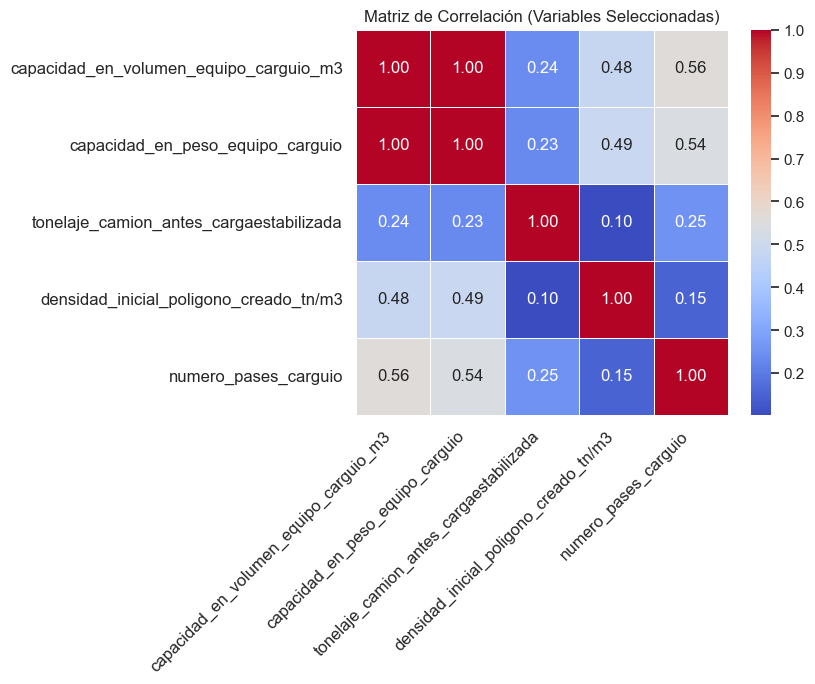

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'datos'

# Lista de variables que deseas analizar
variables_a_analizar = ['capacidad_en_volumen_equipo_carguio_m3',
'capacidad_en_peso_equipo_carguio',
#'capacidad_en_peso_equipo_acarreo',
'tonelaje_camion_antes_cargaestabilizada',
#'angulo_giro_promedio_pases',
'densidad_inicial_poligono_creado_tn/m3',
#'ratio_capcarguio_capacarreo',
'numero_pases_carguio']

# Filtrar el DataFrame para incluir solo las variables de interés
datos_subset = datos[variables_a_analizar]

# Crear una matriz de correlación para el subconjunto de variables
matriz_correlacion = datos_subset.corr()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Aumentar el tamaño del gráfico para mostrar más detalles
plt.figure(figsize=(6, 5))

# Crear un mapa de calor (heatmap) de la matriz de correlación con desplazamiento habilitado
ax = sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)

# Agregar etiquetas a los ejes X e Y
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=8)

# Ajustar el tamaño de las fuentes de los nombres de las variables (eje x)
ax.tick_params(axis='x', labelsize=12)

# Ajustar el tamaño de las fuentes de los nombres de las variables (eje y)
ax.tick_params(axis='y', labelsize=12)

plt.title("Matriz de Correlación (Variables Seleccionadas)")
plt.show()

Variables general, con las Productividades, para que podamos medir el impacto del modelo

In [99]:
# Supongamos que datos es tu DataFrame y has seleccionado tus características (X) y variable objetivo (y)
X_gen = datos[['tonelaje_inicial_poligono_creado',
'radiohexagonocuchara_equipocarguio',
'capacidad_en_volumen_equipo_carguio_m3',
'capacidad_en_peso_equipo_carguio',
'capacidad_en_peso_equipo_acarreo',
'tiempo_estimado_duracion_estado_pala',
'radio_locacion_metros',
'tiempo_ready_llegada_esperando',
'tiempo_ready_esperando_cuadra',
'tonelaje_camion_antes_cargaestabilizada',
'angulo_giro_promedio_pases', 
'tonelaje_segun_computadora',
'id_equipo_camion',
'id_equipo_carguio',
'densidad_inicial_poligono_creado_tn/m3', 
'productividad_operativa_acarreo_tn_h',
'tiempo_llegada_camion',
'tiempo_ready_cuadra_cuadrado',
'tiempo_ready_cuadrado_cargado',
'tiempo_ready_carga_acarreo',
'tiempo_ready_acarreo_cola',
'tiempo_ready_cola_retro',
'tiempo_ready_retro_listo',
'tiempo_ready_listo_descarga',
'tiempo_ready_descarga_viajandovacio',
'tiempo_ready_cargando_pala',
'tiempo_ready_esperando_pala',
#'ratio_capcarguio_capacarreo',
'productividad_operativa_carguio_tn_h',
'capacidad_en_volumen_equipo_acarreo_m3']]  # Reemplaza 'feature1', 'feature2', 'feature3' con tus nombres de características
y_gen = datos['numero_pases_carguio'] # Reemplaza 'variable_objetivo' con el nombre de tu variable objetivo

In [100]:
X_gen.head()

,tonelaje_inicial_poligono_creado,radiohexagonocuchara_equipocarguio,capacidad_en_volumen_equipo_carguio_m3,capacidad_en_peso_equipo_carguio,capacidad_en_peso_equipo_acarreo,tiempo_estimado_duracion_estado_pala,radio_locacion_metros,tiempo_ready_llegada_esperando,tiempo_ready_esperando_cuadra,tonelaje_camion_antes_cargaestabilizada,angulo_giro_promedio_pases,tonelaje_segun_computadora,id_equipo_camion,id_equipo_carguio,densidad_inicial_poligono_creado_tn/m3,productividad_operativa_acarreo_tn_h,tiempo_llegada_camion,tiempo_ready_cuadra_cuadrado,tiempo_ready_cuadrado_cargado,tiempo_ready_carga_acarreo,tiempo_ready_acarreo_cola,tiempo_ready_cola_retro,tiempo_ready_retro_listo,tiempo_ready_listo_descarga,tiempo_ready_descarga_viajandovacio,tiempo_ready_cargando_pala,tiempo_ready_esperando_pala,productividad_operativa_carguio_tn_h,capacidad_en_volumen_equipo_acarreo_m3
0,2242926.000000,680.000000,23.000000,39.158333,229.000000,0.000000,45.000000,0.000000,6.000000,225.800000,0.000000,235.800000,42,74,1.916910,1487.645018,2022-01-01 07:01:58.086000-05:00,14.001000,44.008000,160.560000,236.034000,16.001000,12.002000,46.004000,36.010000,160.560000,229.177000,2178.084195,129.000000
1,77500.000000,680.000000,23.000000,39.158333,229.000000,1200.000000,40.000000,0.000000,6.003000,243.500000,20.000000,234.500000,39,73,2.200000,1827.039404,2022-01-01 07:04:06.421000-05:00,16.002000,8.001000,254.033000,94.015000,0.000000,12.001000,24.001000,48.003000,254.033000,1352.170000,525.587363,129.000000
2,2242926.000000,680.000000,23.000000,39.158333,229.000000,0.000000,45.000000,0.000000,6.002000,232.900000,0.000000,235.400000,56,74,1.916910,843.956990,2022-01-01 07:06:43.839000-05:00,12.000000,42.003000,144.017000,246.029000,8.001000,14.002000,496.065000,36.008000,144.017000,121.189000,3195.402819,129.000000
3,77500.000000,680.000000,23.000000,39.158333,229.000000,1200.000000,40.000000,0.000000,60.006000,234.900000,43.000000,234.900000,39,73,2.200000,1447.852551,2022-01-01 07:12:42.484000-05:00,18.004000,10.001000,306.023000,102.009000,0.000000,12.002000,20.002000,56.018000,306.023000,320.035000,1350.737472,129.000000
4,2242926.000000,680.000000,23.000000,39.158333,229.000000,0.000000,45.000000,0.000000,6.003000,238.400000,0.000000,247.700000,42,74,1.916910,764.691052,2022-01-01 07:15:32.741000-05:00,14.000000,40.006000,160.009000,242.036000,74.003000,10.001000,586.055000,34.005000,160.009000,384.889000,1636.489765,129.000000


In [102]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(X_gen, y_gen, test_size=0.2, random_state=42)

### 1. Tratamiento de Outliers

In [101]:
import pandas as pd

# Iterar a través de las columnas numéricas y limitar los valores atípicos
# Calcular el Q1 y Q3 de la columna
Q1 = datos['numero_pases_carguio'].quantile(0.25)
Q3 = datos['numero_pases_carguio'].quantile(0.75)

# Calcular el rango intercuartilico (IQR)
IQR = Q3 - Q1

# Calcular los límites inferior y superior del bigote
Limite_inferior = round(Q1 - 1.5 * IQR)
Limite_superior = round(Q3 + 1.5 * IQR)

# Limitar los valores atípicos a los límites del bigote en la columna
datos['numero_pases_carguio'] = datos['numero_pases_carguio'].clip(lower=Limite_inferior, upper=Limite_superior)

# Los valores atípicos en todas las variables (que no comienzan con 'id') están limitados a los límites del bigote

In [102]:
datos['numero_pases_carguio'].unique()

array([4, 7, 5, 6, 8], dtype=int64)

### 2. PASO OPCIONAL:Obtenemos la bd que tiene NUMERO DE PASES sin Outliers - MARCOBRE

In [27]:
df1 = datos[['capacidad_en_volumen_equipo_carguio_m3',
'capacidad_en_peso_equipo_carguio',
'capacidad_en_peso_equipo_acarreo',
'tonelaje_camion_antes_cargaestabilizada',
#'angulo_giro_promedio_pases',
'densidad_inicial_poligono_creado_tn/m3']]
#'tiempo_llegada_camion',
#'tonelaje_segun_computadora']]
df2 = datos['numero_pases_carguio']

# Unir los DataFrames a lo largo de las columnas
df_concatenado = pd.concat([df1, df2], axis=1)  #axis=1 unir por columnas

# Mostrar el resultado
df_concatenado

        capacidad_en_volumen_equipo_carguio_m3  \
0                                         23.0   
1                                         23.0   
2                                         23.0   
3                                         23.0   
4                                         23.0   
...                                        ...   
743988                                    12.0   
743989                                    23.0   
743990                                    12.0   
743991                                    23.0   
743992                                    12.0   

        capacidad_en_peso_equipo_carguio  capacidad_en_peso_equipo_acarreo  \
0                              39.158333                             229.0   
1                              39.158333                             229.0   
2                              39.158333                             229.0   
3                              39.158333                             229.0   
4        

In [125]:
#Se guardan los datos que han sido preprocesados y calidad en los datos y cambiados nombres
df_concatenado.to_csv('datos_opmarcobre.csv', date_format='%Y-%m-%d %H:%M:%S.%f%z', index=False)

### 3. Modelos de ML y DL sin Valores atipicos

Hacemos la division entre las variables que seran independientes, y la variable target(dependiente) para los Modelos

In [110]:
#datos.loc[368399]  # Valida y busca por un indice en especifico

In [103]:
# Supongamos que datos es tu DataFrame y has seleccionado tus características (X) y variable objetivo (y)
X = datos[[#'tonelaje_inicial_poligono_creado',
#'radiohexagonocuchara_equipocarguio',
'capacidad_en_volumen_equipo_carguio_m3',
'capacidad_en_peso_equipo_carguio',
'capacidad_en_peso_equipo_acarreo',
#'tiempo_estimado_duracion_estado_pala',
#'radio_locacion_metros',
#'tiempo_ready_llegada_esperando',
#'tiempo_ready_esperando_cuadra',
#'tonelaje_camion_antes_cargaestabilizada',
#'angulo_giro_promedio_pases',
#'tonelaje_segun_computadora',
#'id_equipo_camion', 'id_equipo_carguio',
'densidad_inicial_poligono_creado_tn/m3',
'capacidad_en_volumen_equipo_acarreo_m3']].values

y = datos['numero_pases_carguio'].values # Reemplaza 'variable_objetivo' con el nombre de tu variable objetivo

In [12]:
X.shape, y.shape

((743993, 5), (743993,))

In [10]:
np.unique(y)

array([4, 5, 6, 7, 8], dtype=int64)

In [115]:
#Validar valores unicos en un array de .values
#set(row[4] for row in X)
#np.unique(y)  # ver los valores unicos del array numpy

3.1 Regresion Lineal

In [175]:
# Normalizar los datos, para que la red tenga un mejor rendimiento al procesar datos mas pequenos y en una misma escala
#scaler = StandardScaler()
#X_normalized = scaler.fit_transform(X)

# Convertir DataFrame a array de NumPy
#X_array = X_normalized
#y_array = y.values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal múltiple
modelo_rl = LinearRegression()

# Entrenar el modelo
modelo_rl.fit(X_train_rl, y_train_rl)

# Realizar predicciones en el conjunto de prueba
y_pred_rl = modelo_rl.predict(X_test_rl)

# Redondear los valores de y_pred al entero más cercano
y_pred_rl = np.round(y_pred_rl).astype('int64')

# Medir el rendimiento del modelo
error_absoluto_medio_rl = metrics.mean_absolute_error(y_test_rl, y_pred_rl)
error_cuadratico_medio_rl = metrics.mean_squared_error(y_test_rl, y_pred_rl)
raiz_error_cuadratico_medio_rl = metrics.mean_squared_error(y_test_rl, y_pred_rl, squared=False)
coeficiente_de_determinacion_rl = metrics.r2_score(y_test_rl, y_pred_rl)

# Imprimir métricas de rendimiento
print(f'Error Absoluto Medio: {error_absoluto_medio_rl}')
print(f'Error Cuadrático Medio: {error_cuadratico_medio_rl}')
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_rl}')
print(f'Coeficiente de Determinación (R^2): {coeficiente_de_determinacion_rl}')

Error Absoluto Medio: 0.8186950181116809
Error Cuadrático Medio: 1.2806336064086452
Raíz del Error Cuadrático Medio: 1.1316508323721788
Coeficiente de Determinación (R^2): 0.1517784520384753


3.2 Regresion Lineal V2 - DETECTAR OVERFITTING - METODO 1: RSME 

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Dividir el conjunto de datos en entrenamiento y prueba
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal múltiple
modelo_rl = LinearRegression()

# Entrenar el modelo
modelo_rl.fit(X_train_rl, y_train_rl)


# Realizar predicciones en los conjuntos de entrenamiento y prueba (DETECCION DE "OVERFITING" Si rendimiento de TRAIN es mucho mayor que en TEST)
y_pred_rl_train = modelo_rl.predict(X_train_rl)
#Redondear prediccion
y_pred_rl_train = np.round(y_pred_rl_train).astype('int64')

y_pred_rl_test = modelo_rl.predict(X_test_rl)
#Redondear prediccion
y_pred_rl_test = np.round(y_pred_rl_test).astype('int64')

# Calcular el RMSE en los conjuntos de entrenamiento y prueba
rmse_rl_train = np.sqrt(mean_squared_error(y_train_rl, y_pred_rl_train))
rmse_rl_test = np.sqrt(mean_squared_error(y_test_rl, y_pred_rl_test))

print("RMSE en conjunto de entrenamiento:", rmse_rl_train)
print("RMSE en conjunto de prueba:", rmse_rl_test)

RMSE en conjunto de entrenamiento: 1.1268746470777105
RMSE en conjunto de prueba: 1.1316508323721788


In [17]:
np.unique(y_pred_rl_test)

array([ 4,  6, 25], dtype=int64)

3.3 DETECTAR OVERFITTING - METODO 2: Coeficiente de Determinacion (R2)

In [18]:
# Evaluar el modelo en el conjunto de entrenamiento
train_rl_score = modelo_rl.score(X_train_rl, y_train_rl)
print("Coeficiente de determinación (R^2) en conjunto de entrenamiento:", train_rl_score)

# Evaluar el modelo en el conjunto de prueba
test_rl_score = modelo_rl.score(X_test_rl, y_test_rl)
print("Coeficiente de determinación (R^2) en conjunto de prueba:", test_rl_score)

Coeficiente de determinación (R^2) en conjunto de entrenamiento: 0.2760952114130447
Coeficiente de determinación (R^2) en conjunto de prueba: 0.26613785776017906


3.4 Realizamos una prediccion con el Modelo, en toda la BD Original.

In [19]:
# Realizar predicciones en el conjunto de prueba
y_pred_rl_total = modelo_rl.predict(X_gen[['capacidad_en_volumen_equipo_carguio_m3',
       'capacidad_en_peso_equipo_carguio',
       'capacidad_en_peso_equipo_acarreo',
       'densidad_inicial_poligono_creado_tn/m3','capacidad_en_volumen_equipo_acarreo_m3']])

# Redondear los valores de y_pred al entero más cercano
y_pred_rl_total = np.round(y_pred_rl_total).astype('int64')

c:\Users\BryanInche-MS4M\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [21]:
np.unique(y_pred_rl_total)

array([ 4,  6, 25], dtype=int64)

In [22]:
# Realizar predicciones en el conjunto de prueba
y_pred_rl_total2 = modelo_rl.predict(datos[['capacidad_en_volumen_equipo_carguio_m3',
       'capacidad_en_peso_equipo_carguio',
       'capacidad_en_peso_equipo_acarreo',
       'densidad_inicial_poligono_creado_tn/m3','capacidad_en_volumen_equipo_acarreo_m3']])

# Redondear los valores de y_pred al entero más cercano
y_pred_rl_total2 = np.round(y_pred_rl_total2).astype('int64')

c:\Users\BryanInche-MS4M\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [23]:
np.unique(y_pred_rl_total2)

array([ 4,  6, 25], dtype=int64)

Un RMSE de 1.52 significa que, en promedio, las predicciones tienen un error de alrededor de 1.52 unidades  de nuemro de pases.

Crear un gráfico de valores reales vs predichos

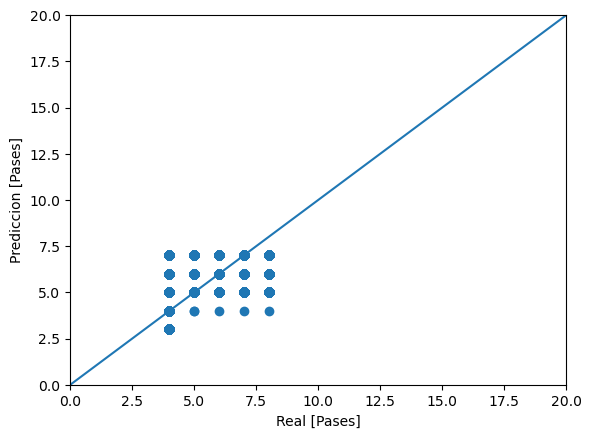

In [12]:
# Visualizar las predicciones
plt.scatter(y_test_rl, y_pred_rl)
plt.xlabel('Real [Pases]')
plt.ylabel('Prediccion [Pases]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

3.2 Arbol de decision Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supongamos que X es tu conjunto de características y y es tu variable objetivo (Número de Pases)
# Asegúrate de tener definidas estas variables antes de ejecutar el código

# Normalizar los datos, para que la red tenga un mejor rendimiento al procesar datos mas pequenos y en una misma escala
#scaler = StandardScaler()
#X_normalized = scaler.fit_transform(X)

# Convertir DataFrame a array de NumPy
#X_array = X_normalized
#y_array = y.values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión para regresión
model_arbol = DecisionTreeRegressor(max_depth=5,random_state=42)

# Entrenar el modelo
model_arbol.fit(X_train_dt, y_train_dt)

# Realizar predicciones en el conjunto de prueba
y_pred_dt = model_arbol.predict(X_test_dt)

# Redondear los valores de y_pred al entero más cercano
y_pred_dt = np.round(y_pred_dt).astype('int64')

# Visualizar el árbol de decisión (opcional)
# Nota: Necesitarás tener instalada la biblioteca graphviz y pydotplus para esto
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = export_graphviz(modelo_arbol, out_file=None, feature_names=X.columns, filled=True, rounded=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_png('arbol_decision.png')

# Medir el rendimiento del modelo
error_absoluto_medio_dt = metrics.mean_absolute_error(y_test_dt, y_pred_dt)
error_cuadratico_medio_dt = metrics.mean_squared_error(y_test_dt, y_pred_dt)
raiz_error_cuadratico_medio_dt = metrics.mean_squared_error(y_test_dt, y_pred_dt, squared=False)

# Imprimir métricas de rendimiento
print(f'Error Absoluto Medio: {error_absoluto_medio_dt}')
print(f'Error Cuadrático Medio: {error_cuadratico_medio_dt}')
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_dt}')

Error Absoluto Medio: 0.7829286487140371
Error Cuadrático Medio: 1.1785227051257066
Raíz del Error Cuadrático Medio: 1.0855978560800987


In [26]:
np.unique(y_pred_dt)

array([4, 5, 6, 7], dtype=int64)

Deteccion de Overfitting (Metodo de R2)

In [25]:
# Evaluar el modelo en el conjunto de entrenamiento
train_dt_score = model_arbol.score(X_train_dt, y_train_dt)
print("Coeficiente de determinación (R^2) en conjunto de entrenamiento:", train_dt_score)

# Evaluar el modelo en el conjunto de prueba
test_dt_score = model_arbol.score(X_test_dt, y_test_dt)
print("Coeficiente de determinación (R^2) en conjunto de prueba:", test_dt_score)

Coeficiente de determinación (R^2) en conjunto de entrenamiento: 0.3067274804882293
Coeficiente de determinación (R^2) en conjunto de prueba: 0.3036150739666482


Deteccion de Overfitting (Metodo de RSME)

In [81]:
y_pred_dt_train = model_arbol.predict(X_train_dt)
#Redondear prediccion
y_pred_dt_train = np.round(y_pred_dt_train).astype('int64')

y_pred_dt_test = modelo_rl.predict(X_test_dt)
#Redondear prediccion
y_pred_dt_test = np.round(y_pred_dt_test).astype('int64')

# Calcular el RMSE en los conjuntos de entrenamiento y prueba
rmse_dt_train = np.sqrt(mean_squared_error(y_train_dt, y_pred_dt_train))
rmse_dt_test = np.sqrt(mean_squared_error(y_test_dt, y_pred_dt_test))

print("RMSE en conjunto de entrenamiento:", rmse_dt_train)
print("RMSE en conjunto de prueba:", rmse_dt_test)

RMSE en conjunto de entrenamiento: 1.0836773488158995
RMSE en conjunto de prueba: 1.1316508323721788


In [27]:
# Realizar predicciones en el conjunto de prueba
y_pred_rl_total2 = model_arbol.predict(datos[['capacidad_en_volumen_equipo_carguio_m3',
       'capacidad_en_peso_equipo_carguio',
       'capacidad_en_peso_equipo_acarreo',
       'densidad_inicial_poligono_creado_tn/m3','capacidad_en_volumen_equipo_acarreo_m3']])

# Redondear los valores de y_pred al entero más cercano
y_pred_rl_total2 = np.round(y_pred_rl_total2).astype('int64')

c:\Users\BryanInche-MS4M\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [28]:
np.unique(y_pred_rl_total2)

array([4, 5, 6, 7], dtype=int64)

Convirtiendo el Modelo Decision Tree de Sklearn a TFLITE (Primero debe pasar por ser convertido en ONNX)

Metodo 1 to SKLEARN TO ONNX

In [79]:
import tensorflow as tf
from skl2onnx import to_onnx

onx = to_onnx(model_arbol, X[:10])
with open("model_arbol.onnx", "wb") as f:
    f.write(onx.SerializeToString())

Metodo 2 to SKLEARN TO ONNX (MAS ADECUADO)

In [80]:
# pip install onnxmltools
# pip install onnxconverter_common
# pip install scikit-learn

In [77]:
from onnxmltools import convert_sklearn
from onnxmltools.utils import save_model
from onnxconverter_common.data_types import FloatTensorType

initial_type = [('float_input', FloatTensorType([None, 5]))]  #None:Dimension datos ; 5 : numero de variables
onx = convert_sklearn(model_arbol, initial_types=initial_type)
save_model(onx, "model_arbol3.onnx")

3.3 Random Forest 

Construye cada árbol de forma independiente y paralela. Cada árbol no tiene conocimiento de la existencia de otros árboles.

In [11]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df con tus datos, y la columna objetivo es 'target'
# Asegúrate de tener las características adecuadas para entrenar el modelo

# Normalizar los datos, para que la red tenga un mejor rendimiento al procesar datos mas pequenos y en una misma escala
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convertir DataFrame a array de NumPy
X_array = X_normalized
y_array = y.values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=20, max_depth=5 ,random_state=42)

# Entrenar el modelo
model_rf.fit(X_train_rf, y_train_rf)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test_rf)

# Redondear los valores de y_pred al entero más cercano
y_pred_rf = np.round(y_pred_rf).astype('int64')

# Medir el rendimiento del modelo
error_absoluto_medio_rf = metrics.mean_absolute_error(y_test_rf, y_pred_rf)
error_cuadratico_medio_rf = metrics.mean_squared_error(y_test_rf, y_pred_rf)
raiz_error_cuadratico_medio_rf = metrics.mean_squared_error(y_test_rf, y_pred_rf, squared=False)

# Imprimir métricas de rendimiento
print(f'Error Absoluto Medio: {error_absoluto_medio_rf}')
print(f'Error Cuadrático Medio: {error_cuadratico_medio_rf}')
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_rf}')

Error Absoluto Medio: 0.7774111385157159
Error Cuadrático Medio: 1.162615340156856
Raíz del Error Cuadrático Medio: 1.078246419032707


3.4 SVM (Support Vector Machine)

In [12]:
from sklearn.svm import SVR

# Normalizar los datos, para que la red tenga un mejor rendimiento al procesar datos mas pequenos y en una misma escala
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convertir DataFrame a array de NumPy
X_array = X_normalized
y_array = y.values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de SVM Regressor
model_svm = SVR(kernel='linear')  # Puedes ajustar los hiperparámetros según sea necesario
model_svm.fit(X_train_svm, y_train_svm)

# Realizar predicciones en el conjunto de prueba con SVM Regressor
y_pred_svm = model_svm.predict(X_test_svm)
y_pred_svm = np.round(y_pred_svm).astype('int64')

# Medir el rendimiento del modelo de SVM Regressor
error_absoluto_medio_svm = metrics.mean_absolute_error(y_test_svm, y_pred_svm)
error_cuadratico_medio_svm = metrics.mean_squared_error(y_test_svm, y_pred_svm)
raiz_error_cuadratico_medio_svm = metrics.mean_squared_error(y_test_svm, y_pred_svm, squared=False)

# Imprimir métricas de rendimiento de SVM Regressor
print("\nMétricas de rendimiento para SVM Regressor:")
print(f'Error Absoluto Medio: {error_absoluto_medio_svm}')
print(f'Error Cuadrático Medio: {error_cuadratico_medio_svm}')
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_svm}')

3.5 XGBoost

Construye árboles de manera secuencial. Cada árbol se entrena para corregir los errores de los árboles anteriores.

In [12]:
# Instalar las bibliotecas necesarias
# pip install xgboost scikit-learn matplotlib

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes un DataFrame llamado df con tus datos, y la columna objetivo es 'target'
# Asegúrate de tener las características adecuadas para entrenar el modelo

# Normalizar los datos, para que la red tenga un mejor rendimiento al procesar datos mas pequenos y en una misma escala
#scaler = StandardScaler()
#X_normalized = scaler.fit_transform(X)

# Convertir DataFrame a array de NumPy
#X_array = X_normalized
#y_array = y.values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

# Crear el modelo de XGBoost
model_xgb = xgb.XGBRegressor(
    learning_rate = 0.1,
    n_estimators=100,  # Número de árboles
    max_depth=7,  # Profundidad máxima de los árboles
    random_state=42
)

# Entrenar el modelo
model_xgb.fit(X_train_xgb, y_train_xgb)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = model_xgb.predict(X_test_xgb)

# Redondear los valores de y_pred al entero más cercano
y_pred_xgb = np.round(y_pred_xgb).astype('int64')

# Medir el rendimiento del modelo
error_absoluto_medio_xgb = metrics.mean_absolute_error(y_test_xgb, y_pred_xgb)
error_cuadratico_medio_xgb = metrics.mean_squared_error(y_test_xgb, y_pred_xgb)
raiz_error_cuadratico_medio_xgb = metrics.mean_squared_error(y_test_xgb, y_pred_xgb, squared=False)

# Imprimir métricas de rendimiento
print(f'Error Absoluto Medio: {error_absoluto_medio_xgb}')
print(f'Error Cuadrático Medio: {error_cuadratico_medio_xgb}')
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_xgb}')

Error Absoluto Medio: 0.76432637316111
Error Cuadrático Medio: 1.131479378221628
Raíz del Error Cuadrático Medio: 1.063710194659066


#### Convertir Modelo XGB entrenado a un formato ONNX

In [81]:
import numpy as np  #Libreria para manejo de operaciones matematicas y matrices

#pip install onnxruntime -- Instalamos esta libreria
import onnxruntime as rt
#onnxruntime es una librería de ejecución de modelos ONNX (Open Neural Network Exchange) que permite cargar y
# ejecutar modelos ONNX en diferentes plataformas y dispositivos.

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb

#pip install --user skl2onnx -- Instala esta libreria como usuario, para no tener problemas de acceso
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes,
)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster
from onnxmltools.convert.xgboost.operator_converters.XGBoost import convert_xgboost
#skl2onnx es una librería que proporciona herramientas para convertir modelos sklearn a 
#formato ONNX. onnxmltools es otra librería que proporciona herramientas para convertir modelos xgboost a formato ONNX. 



# Dividir el conjunto de datos en entrenamiento y prueba
X_train_xgb_onnx, X_test_xgb_onnx, y_train_xgb_onnx, y_test_xgb_onnx = train_test_split(X, y, test_size=0.2, random_state=42)

# Renombrar todas las características para que sigan el patrón 'f%d'
#X_train_renamed = pd.DataFrame(X_train_xgb_onnx, columns=['f{}'.format(i) for i in range(X_train_xgb_onnx.shape[1])])
#X_test_renamed = pd.DataFrame(X_test_xgb_onnx, columns=['f{}'.format(i) for i in range(X_test_xgb_onnx.shape[1])])

# Renombrar todas las características para que sigan el patrón 'f%d'
X_train_xgb_onnx.columns = ['f{}'.format(i) for i in range(X_train_xgb_onnx.shape[1])]
X_test_xgb_onnx.columns = ['f{}'.format(i) for i in range(X_test_xgb_onnx.shape[1])]


# Crear el pipeline sin normalización y con los parámetros específicos para XGBRegressor
pipe = Pipeline([
    ("xgb", XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=7, random_state=42))
])

# Entrenar el pipeline con los datos de train
pipe.fit(X_train_xgb_onnx, y_train_xgb_onnx)

# Convertir el pipeline a formato ONNX
model_onnx = convert_sklearn(
    pipe,
    "pipeline_xgboost",
    #[("input", FloatTensorType([None, X_train_renamed.shape[1]]))],
    #FloatTensorType, que es un tipo de dato de skl2onnx que representa un tensor de punto flotante.
    [("input", FloatTensorType([None, X_train_xgb_onnx.shape[1]]))], #None indica que la dimensión puede ser de cualquier tamaño en 
    #tiempo de ejecución, y X_train_xgb_onnx.shape[1] especifica la longitud de la entrada

    target_opset={"": 12, "ai.onnx.ml": 2} #El opset "" con la versión 12 y el opset "ai.onnx.ml" con la versión 2. Esto indica las versiones
    # de las operaciones ONNX que se utilizarán para generar el modelo ONNX
)

# Guardar el modelo ONNX en disco
with open("pipeline_xgb_model_5var.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

#### Comparacion entre XGB y el XGB.ONNX

1. Predicciones del xgb 

In [82]:
# Definir los nuevos valores para cada variable
nuevos_valores = [
    [22,12, 34, 0, 0]
]

# Realizar predicciones con el pipeline entrenado utilizando los nuevos valores
predictions = pipe.predict(nuevos_valores)

# Imprimir las predicciones
print("Predictions:", predictions)

Predictions: [4.007333]


2. Prediccion con XGB.ONNX utilizando el Runtime de ONNX

In [36]:
import numpy as np
import onnxruntime as rt

# Definir los nuevos valores para cada variable
nuevos_valores = np.array([
    [12,45, 229, 200, 1.91]
], dtype=np.float32)

# Cargar el modelo ONNX
sess = rt.InferenceSession("pipeline_xgb_model_5var.onnx")

# Realizar predicciones con el modelo ONNX utilizando los nuevos valores
pred_onx = sess.run(None, {"input": nuevos_valores})

# Redondear las predicciones al entero más cercano
#pred_onx_rounded = np.round(pred_onx[0]).astype(int)
pred_onx_rounded = np.round(pred_onx).astype(int)

# Imprimir las predicciones
#print("Predictions:", pred_onx[0])
print("Predictions:", pred_onx_rounded)

Predictions: [[[4]]]


3. Prediccion del XGB.ONNX VS la base de test original(RSME)

In [84]:
# Cargar el modelo ONNX
sess = rt.InferenceSession("pipeline_xgb_model_5var.onnx")

# 5. Realizar predicciones con el modelo ONNX utilizando los datos de prueba
pred_onx = sess.run(None, {"input": X_test_xgb.values.astype(np.float32)})
y_pred_onx = pred_onx[0]

# 6. Calcular el rendimiento del modelo ONNX
raiz_error_cuadratico_medio_onnx = metrics.mean_squared_error(y_test_xgb, y_pred_onx, squared=False)

# Imprimir los resultados
print("\nRendimiento del modelo ONNX con ONNX Runtime:")
print("RMSE:", raiz_error_cuadratico_medio_onnx)


Rendimiento del modelo ONNX con ONNX Runtime:
RMSE: 1.0082803309472528


#### Gridseachr para XGB(Hallar los mejores hiperparametros)

In [133]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)

# Define el modelo XGBoost para regresión
model_xgb_regressor = XGBRegressor()

# Define los hiperparámetros que deseas probar
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [20, 50, 100],
    'max_depth': [3, 5, 7]
}

# Configura la búsqueda de hiperparámetros utilizando GridSearchCV
model_grid_search_xgb = GridSearchCV(estimator=model_xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Ajusta el modelo a los datos de entrenamiento
model_grid_search_xgb.fit(X_train_xgb, y_train_xgb)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", model_grid_search_xgb.best_params_)

# Realiza predicciones en el conjunto de prueba
y_pred_xgb = model_grid_search_xgb.predict(X_test_xgb)

# Redondear los valores de y_pred al entero más cercano
y_pred_xgb = np.round(y_pred_xgb).astype('int64')

# Evalúa el rendimiento del modelo en el conjunto de prueba
raiz_error_cuadratico_medio_xgb = metrics.mean_squared_error(y_test_xgb, y_pred_xgb, squared=False)
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_xgb}')


Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Raíz del Error Cuadrático Medio: 1.0141473340463543


Guardar el Mejor Modelo y Scaler en un extension .pkl

In [66]:
import joblib
# Guardar el modelo en un archivo
joblib.dump(model_xgb, 'modelo_xgb_6var.pkl')

['modelo_xgb_6var.pkl']

In [17]:
# Guardar el objeto scaler en un archivo
joblib.dump(scaler, 'scaler_modelo_xgb_6var_N.pkl')

['scaler_modelo_xgb_6var_N.pkl']

Obtener las mejores variables segun el modelo

In [67]:
# Obtener las importancias de las características
feature_importances = model_xgb.feature_importances_

# Crear un DataFrame para mostrar las importancias de las características junto con sus nombres
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las 10 características más importantes
print(feature_importance_df.head(9))

                                   Feature  Importance
0   capacidad_en_volumen_equipo_carguio_m3    0.638024
4               angulo_giro_promedio_pases    0.312969
5   densidad_inicial_poligono_creado_tn/m3    0.036727
3  tonelaje_camion_antes_cargaestabilizada    0.012280
1         capacidad_en_peso_equipo_carguio    0.000000
2         capacidad_en_peso_equipo_acarreo    0.000000


3.6 Red Neuronal

In [104]:
# Aseguramos que los resultados sean "reproducibles" en cada ejecucion de tensorflow(pesos iniciales aleatorios)
import tensorflow as tf
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

Crear MODELO RED NEURONAL DESDE 0

In [32]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X, y, test_size=0.2, random_state=42)

model_rnn_v4 = Sequential()

model_rnn_v4.add(Dense(64, activation='relu', input_shape=[5]))
model_rnn_v4.add(Dense(64))
model_rnn_v4.add(Dense(1, activation='linear'))

# Compilar el modelo
model_rnn_v4.compile(loss='mean_squared_error', optimizer='adam')

model_rnn_v4.fit(X_train_rnn, y_train_rnn, epochs=15)




Epoch 1/15

18600/18600 [==============================] - 17s 860us/step - loss: 1.4014
Epoch 2/15
18600/18600 [==============================] - 16s 878us/step - loss: 1.0984
Epoch 3/15
18600/18600 [==============================] - 37s 2ms/step - loss: 1.0880
Epoch 4/15
18600/18600 [==============================] - 21s 1ms/step - loss: 1.0842
Epoch 5/15
18600/18600 [==============================] - 18s 975us/step - loss: 1.0817
Epoch 6/15
18600/18600 [==============================] - 18s 955us/step - loss: 1.0806
Epoch 7/15
18600/18600 [==============================] - 18s 971us/step - loss: 1.0786
Epoch 8/15
18600/18600 [==============================] - 18s 983us/step - loss: 1.0783
Epoch 9/15
18600/18600 [==============================] - 18s 972us/step - loss: 1.0764
Epoch 10/15
18600/18600 [==============================] - 18s 983us/step - loss: 1.0758
Epoch 11/15
18600/18600 [==============================] - 17s 940us/step - loss: 1.0754
Epoch 12/15
18600/18600 [======

Convertir a tflite

In [34]:
import tensorflow as tf

# Convertir el modelo a formato .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model_rnn_v4)

# Convertir el modelo
tflite_model = converter.convert()

# Guardar el modelo convertido en formato .tflite
with open('rnn_pases_v4.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\BRYANI~1\AppData\Local\Temp\tmpn_yvngg7\assets


INFO:tensorflow:Assets written to: C:\Users\BRYANI~1\AppData\Local\Temp\tmpn_yvngg7\assets


3.6.2 Red Neuronal LSTM (Recurrente)

In [43]:
np.unique(y)

array([4, 5, 6, 7, 8], dtype=int64)

In [42]:
#y[:10] # ver los 10 primeros registros de  un array numpy
np.unique(y_gen)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [46]:
X_test_rnn[:20]

array([[ 0.55151271,  0.5687662 ,  0.        ,  0.28307465,  0.        ],
       [ 0.55151271,  0.5687662 ,  0.        ,  0.31835084,  0.        ],
       [ 0.55151271,  0.5687662 ,  0.        ,  0.4790535 ,  0.        ],
       [ 0.55151271,  0.5687662 ,  0.        ,  0.31051169,  0.        ],
       [-2.89232534, -2.84335155,  0.        , -1.07505877,  0.        ],
       [ 0.55151271,  0.5687662 ,  0.        ,  0.92784506,  0.        ],
       [ 0.55151271,  0.5687662 ,  0.        ,  0.41634027,  0.        ],
       [-0.3668441 , -0.42785653,  0.        , -0.68310107,  0.        ],
       [-0.3668441 , -0.42785653,  0.        ,  0.28111486,  0.        ],
       [ 0.55151271,  0.5687662 ,  0.        ,  0.50257096,  0.        ],
       [ 0.55151271,  0.5687662 ,  0.        ,  0.29483338,  0.        ],
       [ 0.55151271,  0.5687662 ,  0.        ,  0.2909138 ,  0.        ],
       [ 0.55151271,  0.5687662 ,  0.        ,  0.28307465,  0.        ],
       [ 0.55151271,  0.5687662 ,  0. 

In [47]:
y_train_rnn[:20]

array([8, 4, 5, 5, 7, 7, 5, 4, 5, 7, 5, 6, 6, 8, 6, 8, 5, 6, 4, 8],
      dtype=int64)

#### 3.7 Red Neuronal LSTM

Red con Arquitectura 1

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np
import tensorflow as tf
#Librerias para redes neuronales(secuencial)
from tensorflow.keras.models import Sequential
#Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
#Optimizador
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


# Normalizar los datos, para que la red tenga un mejor rendimiento al procesar datos mas pequenos y en una misma escala
#scaler = StandardScaler()
#X_normalized = scaler.fit_transform(X)

# Convertir DataFrame a array de NumPy
#X_array = X_normalized
#y_array = y

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

#---------------------------------------------------------------------------------------------------------------------------------------
model_rnn = Sequential()
# La forma de entrada para LSTM debe ser (n_timesteps, n_features)
model_rnn.add(LSTM(30, activation='relu', input_shape=(1, 5)))  #  (n_samples, n_pasos, n_variables)
# Agregar capas Dense según sea necesario
model_rnn.add(Dense(60, activation='relu'))
model_rnn.add(Dense(30, activation='relu'))
model_rnn.add(Dense(15, activation='relu'))
# Capa de salida
model_rnn.add(Dense(1, activation='linear'))
#-------------------------------------------------------------------------------------------------------------------------------------------

# Compilar el modelo
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
# Imprimir un resumen del modelo
model_rnn.summary()


# Reshape de los datos de entrenamiento
#X_train_rnn_np = X_train_rnn.to_numpy()
#X_train_rnn_reshaped = X_train_rnn_np.reshape(-1, 1, 5)

# Entrenar el modelo
#X_train_rnn.reshape(-1, 1, 1) significa que quieres que NumPy calcule automáticamente el tamaño de la dimensión correspondiente a n_samples
#Si tienes 15 variables en cada paso de tiempo, entonces la forma de entrada para la capa LSTM debería ser (n_samples, n_timesteps, n_features). 
#En este caso, la dimensión n_features debería ser 15
history = model_rnn.fit(X_train_rnn.reshape(-1, 1, 5), y_train_rnn, epochs=15, batch_size=5, verbose=1) # (n_samples, n_pasos, n_variables)
#model_rnn.fit(X_train_rnn_np.reshape(-1, 1, 5), y_train_rnn, epochs=15, batch_size=5, verbose=1) # (n_samples, n_pasos, n_variables)
#RESHAPE :-1 indica que NumPy debe inferir automáticamente el tamaño de la dimensión, 1 dimensión con tamaño 1, 5 VALORES 


# Reshape de los datos de prueba
#X_test_rnn_np = X_test_rnn.to_numpy()


# Hacer predicciones en el conjunto de prueba
y_pred_rnn = model_rnn.predict(X_test_rnn.reshape(-1, 1, 5)) # (n_samples, n_pasos, n_variables)
#y_pred_rnn = model_rnn.predict(X_test_rnn_np.reshape(-1, 1, 5)) # (n_samples, n_pasos, n_variables)

# Redondear los valores de y_pred al entero más cercano
y_pred_rnn = np.round(y_pred_rnn).astype('int64')

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test_rnn, y_pred_rnn)
# Calcular la raíz cuadrada del error cuadrático medio
rmse = np.sqrt(mse)

print(f'Raíz del Error Cuadrático Medio en el conjunto de prueba: {rmse}')

Red con Arquitectura 2

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np
import tensorflow as tf
#Librerias para redes neuronales(secuencial)
from tensorflow.keras.models import Sequential
#Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
#Optimizador
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


# Normalizar los datos, para que la red tenga un mejor rendimiento al procesar datos mas pequenos y en una misma escala
#scaler = StandardScaler()
#X_normalized = scaler.fit_transform(X)

# Convertir DataFrame a array de NumPy
#X_array = X_normalized
#y_array = y

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

#---------------------------------------------------------------------------------------------------------------------------------------
model_rnn = Sequential()
# La forma de entrada para LSTM debe ser (n_timesteps, n_features)
model_rnn.add(LSTM(10, activation='relu', input_shape=(1, 5)))  #  (n_samples, n_pasos, n_variables)
# Agregar capas Dense según sea necesario
# model_rnn.add(Dense(60, activation='relu'))
# model_rnn.add(Dense(30, activation='relu'))
# model_rnn.add(Dense(15, activation='relu'))
# Capa de salida
model_rnn.add(Dense(1, activation='linear'))
#-------------------------------------------------------------------------------------------------------------------------------------------

# Compilar el modelo
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
# Imprimir un resumen del modelo
model_rnn.summary()


# Reshape de los datos de entrenamiento
#X_train_rnn_np = X_train_rnn.to_numpy()
#X_train_rnn_reshaped = X_train_rnn_np.reshape(-1, 1, 5)

# Entrenar el modelo
#X_train_rnn.reshape(-1, 1, 1) significa que quieres que NumPy calcule automáticamente el tamaño de la dimensión correspondiente a n_samples
#Si tienes 15 variables en cada paso de tiempo, entonces la forma de entrada para la capa LSTM debería ser (n_samples, n_timesteps, n_features). 
#En este caso, la dimensión n_features debería ser 15
# Entrenar el modelo y almacenar el historial de entrenamiento
history = model_rnn.fit(X_train_rnn.reshape(-1, 1, 5), y_train_rnn, 
                         epochs=5, batch_size=5, 
                         validation_data=(X_test_rnn.reshape(-1, 1, 5), y_test_rnn),
                         verbose=1)  # (n_samples, n_pasos, n_variables)

# Obtener la pérdida en el conjunto de entrenamiento y el conjunto de validación
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 10)                640       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 651 (2.54 KB)
Trainable params: 651 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
119039/119039 [==============================] - 148s 1ms/step - loss: 2.0949 - val_loss: 1.5098
Epoch 2/5
119039/119039 [==============================] - 154s 1ms/step - loss: 1.5097 - val_loss: 1.5102
Epoch 3/5
119039/119039 [==============================] - 152s 1ms/step - loss: 1.5098 - val_loss: 1.5098
Epoch 4/5
119039/119039 [==============================] - 165s 1ms/step - loss: 1.5098 - val_loss:

#### 3.8 Verificar si hay Overfiting o sobreajuste( Para ver si el modelo no generaliza bien)

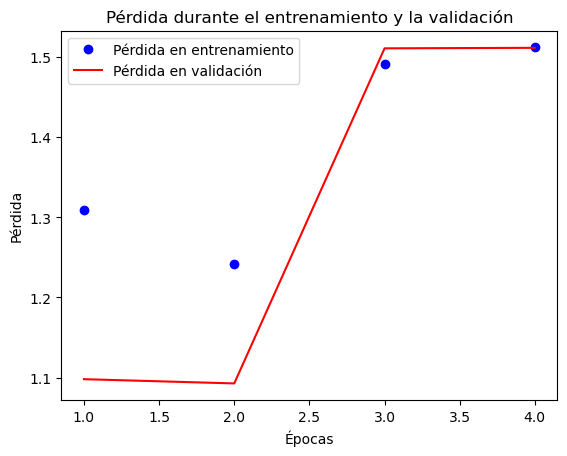

In [87]:
# Crear gráfico de pérdida durante el entrenamiento
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

3.9 Verificamos en la PREDICCION de la Red Neuronal (Que valores esta prediciendo en BD de Test) y Ver si generaliza bien

In [88]:
# Hacer predicciones en el conjunto de prueba
y_pred_rnn = model_rnn.predict(X_test_rnn.reshape(-1, 1, 5)) # (n_samples, n_pasos, n_variables)
#y_pred_rnn = model_rnn.predict(X_test_rnn_np.reshape(-1, 1, 5)) # (n_samples, n_pasos, n_variables)

# Redondear los valores de y_pred al entero más cercano
y_pred_rnn = np.round(y_pred_rnn).astype('int64')

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test_rnn, y_pred_rnn)
# Calcular la raíz cuadrada del error cuadrático medio
rmse = np.sqrt(mse)

print(f'Raíz del Error Cuadrático Medio en el conjunto de prueba: {rmse}')

4650/4650 [==============================] - 4s 839us/step
Raíz del Error Cuadrático Medio en el conjunto de prueba: 1.2759685023236937


In [90]:
np.unique(y_pred_rnn)

array([6], dtype=int64)

3.10 Red Neuronal con Arquitectura 3

In [105]:
X_gen = X_gen[['capacidad_en_volumen_equipo_carguio_m3',
       'capacidad_en_peso_equipo_carguio',
       'capacidad_en_peso_equipo_acarreo',
       'densidad_inicial_poligono_creado_tn/m3','capacidad_en_volumen_equipo_acarreo_m3']].values
y_gen = y_gen.values

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np
import tensorflow as tf
#Librerias para redes neuronales(secuencial)
from tensorflow.keras.models import Sequential
#Capa completamente conectada
from tensorflow.keras.layers import Dense, Normalization
#Optimizador
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler


# Normalizar los datos, para que la red tenga un mejor rendimiento al procesar datos mas pequenos y en una misma escala
#scaler = StandardScaler()
#X_normalized = scaler.fit_transform(X)

# Convertir DataFrame a array de NumPy
#X_array = X_normalized
#y_array = y

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

#---------------------------------------------------------------------------------------------------------------------------------------
model_rnn = Sequential()
# La forma de entrada para LSTM debe ser (n_timesteps, n_features)
model_rnn.add(LSTM(10, activation='relu', input_shape=(1, 5)))  #  (n_samples, n_pasos, n_variables)
# Agregar capas Dense según sea necesario
#model_rnn.add(Dense(60, activation='relu'))
#model_rnn.add(Dense(30, activation='relu'))
model_rnn.add(Dense(5, activation='relu'))
# Capa de salida
model_rnn.add(Dense(1, activation='linear'))
#-------------------------------------------------------------------------------------------------------------------------------------------

# Compilar el modelo
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
# Imprimir un resumen del modelo
model_rnn.summary()


# Reshape de los datos de entrenamiento
#X_train_rnn_np = X_train_rnn.to_numpy()
#X_train_rnn_reshaped = X_train_rnn_np.reshape(-1, 1, 5)

# Entrenar el modelo
#X_train_rnn.reshape(-1, 1, 1) significa que quieres que NumPy calcule automáticamente el tamaño de la dimensión correspondiente a n_samples
#Si tienes 15 variables en cada paso de tiempo, entonces la forma de entrada para la capa LSTM debería ser (n_samples, n_timesteps, n_features). 
#En este caso, la dimensión n_features debería ser 15
# Entrenar el modelo y almacenar el historial de entrenamiento
history = model_rnn.fit(X_train_rnn.reshape(-1, 1, 5), y_train_rnn, 
                         epochs=4, batch_size=5, 
                         validation_data=(X_gen.reshape(-1, 1, 5), y_gen),
                         verbose=1)  # (n_samples, n_pasos, n_variables)

# Obtener la pérdida en el conjunto de entrenamiento y el conjunto de validación
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10)                640       
                                                                 
 dense_18 (Dense)            (None, 5)                 55        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 701 (2.74 KB)
Trainable params: 701 (2.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/4
119039/119039 [==============================] - 272s 2ms/step - loss: 1.4099 - val_loss: 4.7985
Epoch 2/4
119039/119039 [==============================] - 262s 2ms/step - loss: 1.3916 - val_loss: 4.7172
Epoch 3/4
119039/119039 [==============================] - 247s 2ms/step -

Verificar si hay Overfiting

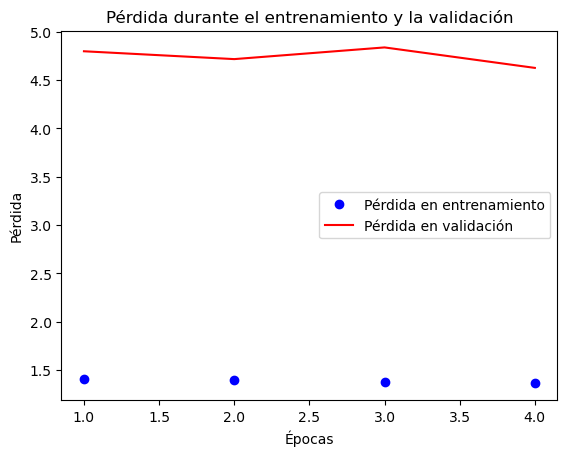

In [107]:
# Crear gráfico de pérdida durante el entrenamiento
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

3.9 Verificamos en la PREDICCION de la Red Neuronal (Que valores esta prediciendo en BD de Test) y Ver si generaliza bien

In [108]:
# Realizar predicciones en el conjunto de prueba
y_pred_rnn_total = model_rnn.predict(X_gen.reshape(-1, 1, 5))

# Redondear los valores de y_pred al entero más cercano
y_pred_rnn_total = np.round(y_pred_rnn_total).astype('int64')

23250/23250 [==============================] - 24s 1ms/step


In [109]:
np.unique(y_pred_rnn_total)

array([5, 6, 7], dtype=int64)

### Pasos para convertir el Modelo a TensorFlow Lite

1. Guardar el modelo Red neuronal en un sitio, con el metodo Save

In [44]:
# Guardar el modelo entrenado

# Guardando todos los componentes del modelo (arquitectura, pesos, configuración de entrenamiento, estado del optimizador, etc.)
# SavedModel de TensorFlow
model_rnn.save("model_rnn_vfinal")

INFO:tensorflow:Assets written to: model_rnn_vfinal\assets


INFO:tensorflow:Assets written to: model_rnn_vfinal\assets


2. Convertir a tflite, para correr en Android 5 o cualquier otro Sistema deseado

In [45]:
import tensorflow as tf

# Cargar el modelo desde la ubicacion donde se guardo con "SavedModel de TensorFlow"
model = tf.keras.models.load_model('model_rnn_vfinal')

# Convertir el modelo a formato .tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Especificar el conjunto de operaciones admitidas
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Operaciones TensorFlow Lite estándar (mayoría de los modelos, como convoluciones, activaciones, etc.)
    tf.lite.OpsSet.SELECT_TF_OPS      # Operaciones TensorFlow adicionales - Esto debes instalar en el Android Studio Gradle
]

# Convertir el modelo
tflite_model = converter.convert()

# Guardar el modelo convertido en formato .tflite
with open('modelrnn_vfinal.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\BRYANI~1\AppData\Local\Temp\tmpnc661bsx\assets


INFO:tensorflow:Assets written to: C:\Users\BRYANI~1\AppData\Local\Temp\tmpnc661bsx\assets


Verificamos el tipo de datos de entrada y salida del Modelo

In [3]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="rnnModel_5var.tflite")
interpreter.allocate_tensors()

# Print input shape and type
print(interpreter.get_input_details()[0]['shape'])  # Example: [1 224 224 3]
print(interpreter.get_input_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

# Print output shape and type
print(interpreter.get_output_details()[0]['shape'])  # Example: [1 1000]
print(interpreter.get_output_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

[1 1 5]
<class 'numpy.float32'>
[1 1]
<class 'numpy.float32'>


In [4]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="modelo_rnn_5varvf.tflite")
interpreter.allocate_tensors()

# Print input shape and type
print(interpreter.get_input_details()[0]['shape'])  # Example: [1 224 224 3]
print(interpreter.get_input_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

# Print output shape and type
print(interpreter.get_output_details()[0]['shape'])  # Example: [1 1000]
print(interpreter.get_output_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

[1 1 5]
<class 'numpy.float32'>
[1 1]
<class 'numpy.float32'>


Verificamos las versiones tf y tflite

In [5]:
print(tf.__version__)

2.15.0


In [6]:
print(help(tf.lite.TFLiteConverter))

Help on class TFLiteConverterV2 in module tensorflow.lite.python.lite:

class TFLiteConverterV2(TFLiteFrozenGraphConverterV2)
 |  TFLiteConverterV2(funcs, trackable_obj=None)
 |  
 |  Converts a TensorFlow model into TensorFlow Lite model.
 |  
 |  Attributes:
 |    optimizations: Experimental flag, subject to change. Set of optimizations to
 |      apply. e.g {tf.lite.Optimize.DEFAULT}. (default None, must be None or a
 |      set of values of type `tf.lite.Optimize`)
 |    representative_dataset: A generator function used for integer quantization
 |      where each generated sample has the same order, type and shape as the
 |      inputs to the model. Usually, this is a small subset of a few hundred
 |      samples randomly chosen, in no particular order, from the training or
 |      evaluation dataset. This is an optional attribute, but required for full
 |      integer quantization, i.e, if `tf.int8` is the only supported type in
 |      `target_spec.supported_types`. Refer to `tf.

#### Metodo 1:Convertir el Modelo RNN LSTM entrenado en Formato TENSOR FLOW LITE (en la misma Sesion)

## RED NEURONAL TO TENSOR FLOW LITE

In [91]:
import tensorflow as tf

# Configurar el convertidor TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model=model_rnn)

# Especificar las operaciones admitidas por el modelo TFLite
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

# Deshabilitar la conversión de operaciones de lista de tensores
converter._experimental_lower_tensor_list_ops = False

# Convertir el modelo a TensorFlow Lite
model_tflite = converter.convert()

# Guardar el modelo TensorFlow Lite en disco
with open("rnnModel_5var.tflite", "wb") as f:
    f.write(model_tflite)

INFO:tensorflow:Assets written to: C:\Users\BRYANI~1\AppData\Local\Temp\tmp536qwl7a\assets


INFO:tensorflow:Assets written to: C:\Users\BRYANI~1\AppData\Local\Temp\tmp536qwl7a\assets


#### Metodo 2: Guardamos el Modelo RNN en una carpeta, y en otra SESION, convertimos a TF LITE

In [15]:
import tensorflow as tf

# Guarda el modelo en formato SavedModel
tf.keras.models.save_model(model_rnn, 'modelo_rnn_guardado/')

#Convierte el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_saved_model('modelo_rnn_guardado/')
model_tflite = converter.convert()

# Guarda el modelo TensorFlow Lite en disco
with open("rnnModelv2.tflite", "wb") as f:
    f.write(model_tflite)

'\nimport tensorflow as tf\n\n# Guarda el modelo en formato SavedModel\ntf.keras.models.save_model(model_rnn, \'modelo_rnn_guardado/\')\n\n#Convierte el modelo a TensorFlow Lite\nconverter = tf.lite.TFLiteConverter.from_saved_model(\'modelo_rnn_guardado/\')\nmodel_tflite = converter.convert()\n\n# Guarda el modelo TensorFlow Lite en disco\nwith open("rnnModelv2.tflite", "wb") as f:\n    f.write(model_tflite)\n'

Validamos el funcionamiento del Modelo TF Lite

In [18]:
#X_test_xgb

In [41]:
import numpy as np
import tensorflow as tf

# Cargar el modelo TFLite
interpreter = tf.lite.Interpreter(model_path="rnnModel_5var.tflite")
interpreter.allocate_tensors()

# Función para realizar predicciones
def predict(input_data):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    return output_data

# Ingresar manualmente un conjunto de datos
# Aquí debes ingresar un conjunto de datos con la forma adecuada: (n_samples, n_timesteps, n_variables)
# En este caso, sería (1, 1, 5) ya que solo estamos ingresando un registro con 5 variables
input_data = np.array([[[23, 39.15, 229, 243.5, 2.2]]], dtype=np.float32)

# Realizar la predicción
prediction = predict(input_data)
prediction_round = np.round(prediction).astype(int)

# Mostrar resultados
print("Datos de entrada:", input_data)
print("Predccion Decimal:", prediction)
print("Predicción Enteros:", prediction_round)

Datos de entrada: [[[ 23.    39.15 229.   243.5    2.2 ]]]
Predccion Decimal: [[6.432984]]
Predicción Enteros: [[6]]


Validacion del Modelo TF Lite para predecir toda la BD de Test

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error

# Cargar el modelo TFLite
interpreter = tf.lite.Interpreter(model_path="model_rnn.tflite")
interpreter.allocate_tensors()

# Función para realizar predicciones
def predict(input_data):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    return output_data

# Realizar predicciones en todo el conjunto de prueba X_test
y_pred_rnn = []
for x in X_test_rnn:
    x_reshaped = np.array(x).reshape((1, 1, 5))  # Asegurarse de que tenga la forma correcta
    prediction = predict(x_reshaped)
    rounded_prediction = np.round(prediction).astype(int)
    y_pred_rnn.append(rounded_prediction[0][0])

# Redondear las predicciones al entero más cercano
y_pred_rnn = np.array(y_pred_rnn)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_test_xgb, y_pred_rnn))
print("RMSE:", rmse)

## RED NEURONAL TO ONNX

#### 2.Convertor Modelo RNN  a ONNX

In [26]:
import tensorflow as tf
import tf2onnx
import onnx

# Define el modelo de entrada como un TensorSpec con la forma correcta
input_signature = [tf.TensorSpec([None, 1, 5], tf.float32, name='x')]
# Use from_function for tf functions
onnx_model, _ = tf2onnx.convert.from_keras(model_rnn, input_signature, opset=13)
onnx.save(onnx_model, "model_rnn5var.onnx")

#### Validacion del Modelo RNN.ONNX

2. Prediccion con RNN.ONNX utilizando el Runtime de ONNX

In [49]:
import onnxruntime as ort
import numpy as np

# Valores de ejemplo para las 5 variables de entrada
input_values = np.array([[[12, 29 , 229, 100, 3]]], dtype=np.float32)

# Cargar el modelo ONNX entrenado
sess = ort.InferenceSession("model_rnn5var.onnx")

# Obtener los nombres de los tensores de entrada esperados por el modelo ONNX
input_name = sess.get_inputs()[0].name

# Realizar predicciones con el modelo ONNX utilizando los valores de entrada
predictions = sess.run(None, {input_name: input_values})


# Imprimir las predicciones
print("Predictions:", predictions)

Predictions: [array([[4.478447]], dtype=float32)]


3. Prediccion del RNN.ONNX VS la base de test original(RSME)

In [68]:
import onnxruntime as ort
import numpy as np
from sklearn.metrics import mean_squared_error

# Cargar el modelo ONNX entrenado
sess = ort.InferenceSession("model_rnn5var.onnx")

# Obtener el nombre del tensor de entrada esperado por el modelo ONNX
input_name = sess.get_inputs()[0].name

# Convertir X_test_rnn a un único array de NumPy si es necesario y luego a float32
X_test_rnn_np2 = X_test_rnn.to_numpy().astype(np.float32)

X_test_rnn_np2 = X_test_rnn_np2.reshape(-1, 1, 5)

# Realizar predicciones con el modelo ONNX utilizando los datos de entrada X_test
predictions = sess.run(None, {input_name: X_test_rnn_np2})

# Redondear las predicciones al entero más cercano
rounded_predictions = np.round(predictions).astype(np.float32)

# Redimensionar rounded_predictions para que coincida con las dimensiones de y_test_rnn
rounded_predictions_resized = np.squeeze(rounded_predictions)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_test_rnn, rounded_predictions_resized))

print("RMSE:", rmse)

RMSE: 1.1225099684299729


In [66]:
y_test_rnn.shape

(148799,)

In [67]:
rounded_predictions.shape

(1, 148799, 1)

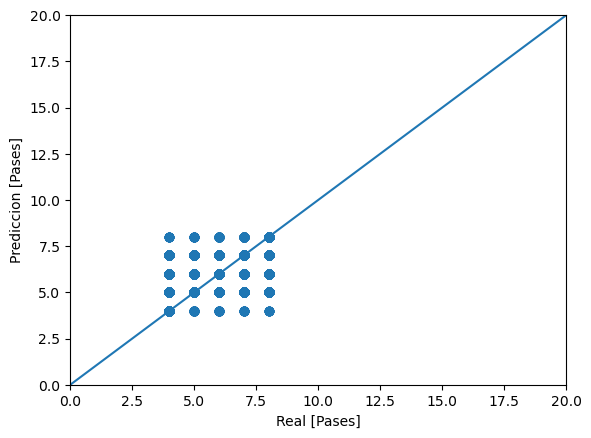

In [67]:
# Visualizar las predicciones
plt.scatter(y_test_rnn, y_pred_rnn)
plt.xlabel('Real [Pases]')
plt.ylabel('Prediccion [Pases]')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

#### 4. Cargamos el mejor modelo de ML(Entrenado) - Si elgimos esta opcion, deberiamos ya tener nuestro modelo en la ruta como: (modelo.pkl)
#### Si no se tiene Modelo entrenado en  .pkl. Pasar al paso siguiente

In [151]:
# Cargar el modelo guardado
model_xgb = joblib.load('modelo_xgb_6var_N.pkl')  
# Modelo_Var4: 'capacidad_en_volumen_equipo_carguio_m3','angulo_giro_promedio_pases','densidad_inicial_poligono_creado_tn/m3'

Vericamos si el Modelo esta funcionando adecuadamente

In [153]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Normalizar los datos, para que la red tenga un mejor rendimiento al procesar datos mas pequenos y en una misma escala
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convertir DataFrame a array de NumPy
X_array = X_normalized
y_array = y.values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = model_xgb.predict(X_test_xgb)

# Redondear los valores de y_pred al entero más cercano
y_pred_xgb = np.round(y_pred_xgb).astype('int64')

# Medir el rendimiento del modelo
error_absoluto_medio_xgb = metrics.mean_absolute_error(y_test_xgb, y_pred_xgb)
error_cuadratico_medio_xgb = metrics.mean_squared_error(y_test_xgb, y_pred_xgb)
raiz_error_cuadratico_medio_xgb = metrics.mean_squared_error(y_test_xgb, y_pred_xgb, squared=False)

# Imprimir métricas de rendimiento
print(f'Error Absoluto Medio: {error_absoluto_medio_xgb}')
print(f'Error Cuadrático Medio: {error_cuadratico_medio_xgb}')
print(f'Raíz del Error Cuadrático Medio: {raiz_error_cuadratico_medio_xgb}')

Error Absoluto Medio: 0.7213825361729581
Error Cuadrático Medio: 1.0284948151533277
Raíz del Error Cuadrático Medio: 1.0141473340463543


### 5. Armando los BaseFinal, con los valores predichos de cada Modelo, y tambien medir el impacto con productividades

In [30]:
# Agregar las predicciones como una columna adicional al conjunto de prueba
df_resultados_models = X_test_gen.copy()
df_resultados_models['Numero_pases_real'] = y_test_gen
df_resultados_models['Numero_pases_real_v2'] = y_test_rnn
#df_resultados_models['Numero_pases_reglineal'] = y_pred_rl
# df_resultados_models['Numero_pases_arboldecision'] = y_pred_dt
# df_resultados_models['Numero_pases_rforest'] = y_pred_rf
#df_resultados_models['Numero_pases_xgb'] = y_pred_xgb
df_resultados_models['Numero_pases_rnn'] = y_pred_rnn

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Aumento o disminucion de pases con respecto a la prediccion del modelo
m = 1 # aumento
n = 1 # disminuye

# Regresion Lineal
# df_resultados_models['Numero_pases_reglineal+1'] = df_resultados_models['Numero_pases_reglineal'] + m
# df_resultados_models['Numero_pases_reglineal-1'] = df_resultados_models['Numero_pases_reglineal'] - n

# Arbol de decision Regressor
#df_resultados_models['Numero_pases_arboldecision+1'] = df_resultados_models['Numero_pases_arboldecision'] + m
#df_resultados_models['Numero_pases_arboldecision-1'] = df_resultados_models['Numero_pases_arboldecision'] - n

# Random Forest
#df_resultados_models['Numero_pases_rforest+1'] = df_resultados_models['Numero_pases_rforest'] + m
#df_resultados_models['Numero_pases_rforest-1'] = df_resultados_models['Numero_pases_rforest'] - n

# XGB
#df_resultados_models['Numero_pases_xgb+1'] = df_resultados_models['Numero_pases_xgb'] + m
#df_resultados_models['Numero_pases_xgb-1'] = df_resultados_models['Numero_pases_xgb'] - n

# Redes Neuronales LSTM
#df_resultados_models['Numero_pases_rnn+1'] = df_resultados_models['Numero_pases_rnn'] + m
#df_resultados_models['Numero_pases_rnn-1'] = df_resultados_models['Numero_pases_rnn'] - n


#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Regresion Lineal
# df_resultados_models['Diferencia_Pases_rl'] = df_resultados_models['Numero_pases_reglineal'] - df_resultados_models['Numero_pases_real']
# df_resultados_models['tonelaje_segun_computadora_rl'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_rl']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # # Regresion Lineal + 1
# # df_resultados_models['Diferencia_Pases_rl+1'] = df_resultados_models['Numero_pases_reglineal+1'] - df_resultados_models['Numero_pases_reglineal']
# # df_resultados_models['tonelaje_segun_computadora_rl+1'] = (df_resultados_models['tonelaje_segun_computadora_rl']) + (df_resultados_models['Diferencia_Pases_rl+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # # Regresion Lineal - 1
# # df_resultados_models['Diferencia_Pases_rl-1'] = df_resultados_models['Numero_pases_reglineal-1'] - df_resultados_models['Numero_pases_reglineal']
# # df_resultados_models['tonelaje_segun_computadora_rl-1'] = (df_resultados_models['tonelaje_segun_computadora_rl']) + (df_resultados_models['Diferencia_Pases_rl-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# #Arbol de decision
# df_resultados_models['Diferencia_Pases_dt'] = df_resultados_models['Numero_pases_arboldecision'] - df_resultados_models['Numero_pases_real']
# df_resultados_models['tonelaje_segun_computadora_dt'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_dt']*df_resultados_models['capacidad_en_peso_equipo_carguio'])


# # Arbol de decision + 1
# #df_resultados_models['Diferencia_Pases_dt+1'] = df_resultados_models['Numero_pases_arboldecision+1'] - df_resultados_models['Numero_pases_arboldecision']
# #df_resultados_models['tonelaje_segun_computadora_dt+1'] = (df_resultados_models['tonelaje_segun_computadora_dt']) + (df_resultados_models['Diferencia_Pases_dt+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # Arbol de decision - 1
# #df_resultados_models['Diferencia_Pases_dt-1'] = df_resultados_models['Numero_pases_arboldecision-1'] - df_resultados_models['Numero_pases_arboldecision']
# #df_resultados_models['tonelaje_segun_computadora_dt-1'] = (df_resultados_models['tonelaje_segun_computadora_dt']) + (df_resultados_models['Diferencia_Pases_dt-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # Random Forest 
# df_resultados_models['Diferencia_Pases_rf'] = df_resultados_models['Numero_pases_rforest'] - df_resultados_models['Numero_pases_real']
# df_resultados_models['tonelaje_segun_computadora_rf'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_rf']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # Random Forest  + 1
# #df_resultados_models['Diferencia_Pases_rf+1'] = df_resultados_models['Numero_pases_rforest+1'] - df_resultados_models['Numero_pases_rforest']
# #df_resultados_models['tonelaje_segun_computadora_rf+1'] = (df_resultados_models['tonelaje_segun_computadora_rf']) + (df_resultados_models['Diferencia_Pases_rf+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # Random Forest  - 1
# #df_resultados_models['Diferencia_Pases_rf-1'] = df_resultados_models['Numero_pases_rforest-1'] - df_resultados_models['Numero_pases_rforest']
# #df_resultados_models['tonelaje_segun_computadora_rf-1'] = (df_resultados_models['tonelaje_segun_computadora_rf']) + (df_resultados_models['Diferencia_Pases_rf-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# XGB (eXtreme Gradient Boosting)
#df_resultados_models['Diferencia_Pases_xgb'] = df_resultados_models['Numero_pases_xgb'] - df_resultados_models['Numero_pases_real']
#df_resultados_models['tonelaje_segun_computadora_xgb'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_xgb']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# XGB  + 1
#df_resultados_models['Diferencia_Pases_xgb+1'] = df_resultados_models['Numero_pases_xgb+1'] - df_resultados_models['Numero_pases_xgb']
#df_resultados_models['tonelaje_segun_computadora_xgb+1'] = (df_resultados_models['tonelaje_segun_computadora_xgb']) + (df_resultados_models['Diferencia_Pases_xgb+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# XGB - 1
#df_resultados_models['Diferencia_Pases_xgb-1'] = df_resultados_models['Numero_pases_xgb-1'] - df_resultados_models['Numero_pases_xgb']
#df_resultados_models['tonelaje_segun_computadora_xgb-1'] = (df_resultados_models['tonelaje_segun_computadora_xgb']) + (df_resultados_models['Diferencia_Pases_xgb-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# RNN (Redes Neuronales LSTM)
df_resultados_models['Diferencia_Pases_rnn'] = df_resultados_models['Numero_pases_rnn'] - df_resultados_models['Numero_pases_real']
df_resultados_models['tonelaje_segun_computadora_rnn'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_rnn']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # RNN  + 1
# #df_resultados_models['Diferencia_Pases_rnn+1'] = df_resultados_models['Numero_pases_rnn+1'] - df_resultados_models['Numero_pases_rnn']
# #df_resultados_models['tonelaje_segun_computadora_rnn+1'] = (df_resultados_models['tonelaje_segun_computadora_rnn']) + (df_resultados_models['Diferencia_Pases_rnn+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # RNN - 1
# #df_resultados_models['Diferencia_Pases_rnn-1'] = df_resultados_models['Numero_pases_rnn-1'] - df_resultados_models['Numero_pases_rnn']
# #df_resultados_models['tonelaje_segun_computadora_rnn-1'] = (df_resultados_models['tonelaje_segun_computadora_rnn']) + (df_resultados_models['Diferencia_Pases_rnn-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])


# #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# #Hallamos el tiempo ready de cargando de la pala, en cada pase, para que se simule, si incrementa o disminuye pases(en base al modelo)
#df_resultados_models['tiempo_ready_cargando_pala_por_pase'] = np.where(df_resultados_models['Numero_pases_real'] == 0, 0, df_resultados_models['tiempo_ready_cargando_pala'] / df_resultados_models['Numero_pases_real'])
#df_resultados_models['tiempo_ready_cargando_pala_rl+1'] = df_resultados_models['tiempo_ready_cargando_pala'] + df_resultados_models['tiempo_ready_cargando_pala_por_pase']
#df_resultados_models['tiempo_ready_cargando_pala_rl-1'] = df_resultados_models['tiempo_ready_cargando_pala'] - df_resultados_models['tiempo_ready_cargando_pala_por_pase']

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

df_resultados_models.head(5)

NameError: name 'X_test_gen' is not defined

Opcion 2 : Donde predeciremos todo la base, no solo test, esto para saber la produccion total al final del turno, y se pueda tomar en 
cuenta todos los datos

In [61]:
np.unique(y_pred_rnn_total)

array([4, 6, 7], dtype=int64)

In [62]:
# Agregar las predicciones como una columna adicional al conjunto de prueba
df_resultados_models = X_gen.copy()
df_resultados_models['Numero_pases_real'] = y_gen
#df_resultados_models['Numero_pases_real_v2'] = y_test_rnn
#df_resultados_models['Numero_pases_reglineal'] = y_pred_rl
# df_resultados_models['Numero_pases_arboldecision'] = y_pred_dt
# df_resultados_models['Numero_pases_rforest'] = y_pred_rf
#df_resultados_models['Numero_pases_xgb'] = y_pred_xgb
df_resultados_models['Numero_pases_rnn'] = y_pred_rnn_total

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Aumento o disminucion de pases con respecto a la prediccion del modelo
m = 1 # aumento
n = 1 # disminuye

# Regresion Lineal
# df_resultados_models['Numero_pases_reglineal+1'] = df_resultados_models['Numero_pases_reglineal'] + m
# df_resultados_models['Numero_pases_reglineal-1'] = df_resultados_models['Numero_pases_reglineal'] - n

# Arbol de decision Regressor
#df_resultados_models['Numero_pases_arboldecision+1'] = df_resultados_models['Numero_pases_arboldecision'] + m
#df_resultados_models['Numero_pases_arboldecision-1'] = df_resultados_models['Numero_pases_arboldecision'] - n

# Random Forest
#df_resultados_models['Numero_pases_rforest+1'] = df_resultados_models['Numero_pases_rforest'] + m
#df_resultados_models['Numero_pases_rforest-1'] = df_resultados_models['Numero_pases_rforest'] - n

# XGB
#df_resultados_models['Numero_pases_xgb+1'] = df_resultados_models['Numero_pases_xgb'] + m
#df_resultados_models['Numero_pases_xgb-1'] = df_resultados_models['Numero_pases_xgb'] - n

# Redes Neuronales LSTM
#df_resultados_models['Numero_pases_rnn+1'] = df_resultados_models['Numero_pases_rnn'] + m
#df_resultados_models['Numero_pases_rnn-1'] = df_resultados_models['Numero_pases_rnn'] - n


#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#Regresion Lineal
# df_resultados_models['Diferencia_Pases_rl'] = df_resultados_models['Numero_pases_reglineal'] - df_resultados_models['Numero_pases_real']
# df_resultados_models['tonelaje_segun_computadora_rl'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_rl']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # # Regresion Lineal + 1
# # df_resultados_models['Diferencia_Pases_rl+1'] = df_resultados_models['Numero_pases_reglineal+1'] - df_resultados_models['Numero_pases_reglineal']
# # df_resultados_models['tonelaje_segun_computadora_rl+1'] = (df_resultados_models['tonelaje_segun_computadora_rl']) + (df_resultados_models['Diferencia_Pases_rl+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # # Regresion Lineal - 1
# # df_resultados_models['Diferencia_Pases_rl-1'] = df_resultados_models['Numero_pases_reglineal-1'] - df_resultados_models['Numero_pases_reglineal']
# # df_resultados_models['tonelaje_segun_computadora_rl-1'] = (df_resultados_models['tonelaje_segun_computadora_rl']) + (df_resultados_models['Diferencia_Pases_rl-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# #Arbol de decision
# df_resultados_models['Diferencia_Pases_dt'] = df_resultados_models['Numero_pases_arboldecision'] - df_resultados_models['Numero_pases_real']
# df_resultados_models['tonelaje_segun_computadora_dt'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_dt']*df_resultados_models['capacidad_en_peso_equipo_carguio'])


# # Arbol de decision + 1
# #df_resultados_models['Diferencia_Pases_dt+1'] = df_resultados_models['Numero_pases_arboldecision+1'] - df_resultados_models['Numero_pases_arboldecision']
# #df_resultados_models['tonelaje_segun_computadora_dt+1'] = (df_resultados_models['tonelaje_segun_computadora_dt']) + (df_resultados_models['Diferencia_Pases_dt+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # Arbol de decision - 1
# #df_resultados_models['Diferencia_Pases_dt-1'] = df_resultados_models['Numero_pases_arboldecision-1'] - df_resultados_models['Numero_pases_arboldecision']
# #df_resultados_models['tonelaje_segun_computadora_dt-1'] = (df_resultados_models['tonelaje_segun_computadora_dt']) + (df_resultados_models['Diferencia_Pases_dt-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # Random Forest 
# df_resultados_models['Diferencia_Pases_rf'] = df_resultados_models['Numero_pases_rforest'] - df_resultados_models['Numero_pases_real']
# df_resultados_models['tonelaje_segun_computadora_rf'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_rf']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # Random Forest  + 1
# #df_resultados_models['Diferencia_Pases_rf+1'] = df_resultados_models['Numero_pases_rforest+1'] - df_resultados_models['Numero_pases_rforest']
# #df_resultados_models['tonelaje_segun_computadora_rf+1'] = (df_resultados_models['tonelaje_segun_computadora_rf']) + (df_resultados_models['Diferencia_Pases_rf+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # Random Forest  - 1
# #df_resultados_models['Diferencia_Pases_rf-1'] = df_resultados_models['Numero_pases_rforest-1'] - df_resultados_models['Numero_pases_rforest']
# #df_resultados_models['tonelaje_segun_computadora_rf-1'] = (df_resultados_models['tonelaje_segun_computadora_rf']) + (df_resultados_models['Diferencia_Pases_rf-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# XGB (eXtreme Gradient Boosting)
#df_resultados_models['Diferencia_Pases_xgb'] = df_resultados_models['Numero_pases_xgb'] - df_resultados_models['Numero_pases_real']
#df_resultados_models['tonelaje_segun_computadora_xgb'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_xgb']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# XGB  + 1
#df_resultados_models['Diferencia_Pases_xgb+1'] = df_resultados_models['Numero_pases_xgb+1'] - df_resultados_models['Numero_pases_xgb']
#df_resultados_models['tonelaje_segun_computadora_xgb+1'] = (df_resultados_models['tonelaje_segun_computadora_xgb']) + (df_resultados_models['Diferencia_Pases_xgb+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# XGB - 1
#df_resultados_models['Diferencia_Pases_xgb-1'] = df_resultados_models['Numero_pases_xgb-1'] - df_resultados_models['Numero_pases_xgb']
#df_resultados_models['tonelaje_segun_computadora_xgb-1'] = (df_resultados_models['tonelaje_segun_computadora_xgb']) + (df_resultados_models['Diferencia_Pases_xgb-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# RNN (Redes Neuronales LSTM)
df_resultados_models['Diferencia_Pases_rnn'] = df_resultados_models['Numero_pases_rnn'] - df_resultados_models['Numero_pases_real']
df_resultados_models['tonelaje_segun_computadora_rnn'] = (df_resultados_models['tonelaje_segun_computadora']) + (df_resultados_models['Diferencia_Pases_rnn']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # RNN  + 1
# #df_resultados_models['Diferencia_Pases_rnn+1'] = df_resultados_models['Numero_pases_rnn+1'] - df_resultados_models['Numero_pases_rnn']
# #df_resultados_models['tonelaje_segun_computadora_rnn+1'] = (df_resultados_models['tonelaje_segun_computadora_rnn']) + (df_resultados_models['Diferencia_Pases_rnn+1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])

# # RNN - 1
# #df_resultados_models['Diferencia_Pases_rnn-1'] = df_resultados_models['Numero_pases_rnn-1'] - df_resultados_models['Numero_pases_rnn']
# #df_resultados_models['tonelaje_segun_computadora_rnn-1'] = (df_resultados_models['tonelaje_segun_computadora_rnn']) + (df_resultados_models['Diferencia_Pases_rnn-1']*df_resultados_models['capacidad_en_peso_equipo_carguio'])


# #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# #Hallamos el tiempo ready de cargando de la pala, en cada pase, para que se simule, si incrementa o disminuye pases(en base al modelo)
#df_resultados_models['tiempo_ready_cargando_pala_por_pase'] = np.where(df_resultados_models['Numero_pases_real'] == 0, 0, df_resultados_models['tiempo_ready_cargando_pala'] / df_resultados_models['Numero_pases_real'])
#df_resultados_models['tiempo_ready_cargando_pala_rl+1'] = df_resultados_models['tiempo_ready_cargando_pala'] + df_resultados_models['tiempo_ready_cargando_pala_por_pase']
#df_resultados_models['tiempo_ready_cargando_pala_rl-1'] = df_resultados_models['tiempo_ready_cargando_pala'] - df_resultados_models['tiempo_ready_cargando_pala_por_pase']

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

df_resultados_models.head(5)

,tonelaje_inicial_poligono_creado,radiohexagonocuchara_equipocarguio,capacidad_en_volumen_equipo_carguio_m3,capacidad_en_peso_equipo_carguio,capacidad_en_peso_equipo_acarreo,tiempo_estimado_duracion_estado_pala,radio_locacion_metros,tiempo_ready_llegada_esperando,tiempo_ready_esperando_cuadra,tonelaje_camion_antes_cargaestabilizada,angulo_giro_promedio_pases,tonelaje_segun_computadora,id_equipo_camion,id_equipo_carguio,densidad_inicial_poligono_creado_tn/m3,productividad_operativa_acarreo_tn_h,tiempo_llegada_camion,tiempo_ready_cuadra_cuadrado,tiempo_ready_cuadrado_cargado,tiempo_ready_carga_acarreo,tiempo_ready_acarreo_cola,tiempo_ready_cola_retro,tiempo_ready_retro_listo,tiempo_ready_listo_descarga,tiempo_ready_descarga_viajandovacio,tiempo_ready_cargando_pala,tiempo_ready_esperando_pala,productividad_operativa_carguio_tn_h,capacidad_en_volumen_equipo_acarreo_m3,Numero_pases_real,Numero_pases_rnn,Diferencia_Pases_rnn,tonelaje_segun_computadora_rnn
0,2242926.000000,680.000000,23.000000,39.158333,229.000000,0.000000,45.000000,0.000000,6.000000,225.800000,0.000000,235.800000,42,74,1.916910,1487.645018,2022-01-01 07:01:58.086000-05:00,14.001000,44.008000,160.560000,236.034000,16.001000,12.002000,46.004000,36.010000,160.560000,229.177000,2178.084195,129.000000,0,7,7,509.908333
1,77500.000000,680.000000,23.000000,39.158333,229.000000,1200.000000,40.000000,0.000000,6.003000,243.500000,20.000000,234.500000,39,73,2.200000,1827.039404,2022-01-01 07:04:06.421000-05:00,16.002000,8.001000,254.033000,94.015000,0.000000,12.001000,24.001000,48.003000,254.033000,1352.170000,525.587363,129.000000,7,7,0,234.500000
2,2242926.000000,680.000000,23.000000,39.158333,229.000000,0.000000,45.000000,0.000000,6.002000,232.900000,0.000000,235.400000,56,74,1.916910,843.956990,2022-01-01 07:06:43.839000-05:00,12.000000,42.003000,144.017000,246.029000,8.001000,14.002000,496.065000,36.008000,144.017000,121.189000,3195.402819,129.000000,0,7,7,509.508333
3,77500.000000,680.000000,23.000000,39.158333,229.000000,1200.000000,40.000000,0.000000,60.006000,234.900000,43.000000,234.900000,39,73,2.200000,1447.852551,2022-01-01 07:12:42.484000-05:00,18.004000,10.001000,306.023000,102.009000,0.000000,12.002000,20.002000,56.018000,306.023000,320.035000,1350.737472,129.000000,7,7,0,234.900000
4,2242926.000000,680.000000,23.000000,39.158333,229.000000,0.000000,45.000000,0.000000,6.003000,238.400000,0.000000,247.700000,42,74,1.916910,764.691052,2022-01-01 07:15:32.741000-05:00,14.000000,40.006000,160.009000,242.036000,74.003000,10.001000,586.055000,34.005000,160.009000,384.889000,1636.489765,129.000000,0,7,7,521.808333


#### 6. Calculemos la Produccion (Tonelaje movido) en el turno. REAL vs Modelo XGB 

In [63]:
# 1. Ordenamos las fechas desde mas antiguo al mas reciente
df_resultados_models = df_resultados_models.sort_values(by='tiempo_llegada_camion', ascending=True)

# 2. Creamos una nueva columna 'dia' basada en la fecha
df_resultados_models['dia'] = df_resultados_models['tiempo_llegada_camion'].dt.date

# 3. Asignamos si cada registro pertenece al turno 1 o 2
df_resultados_models['turno'] = df_resultados_models['tiempo_llegada_camion'].apply(lambda x: 1 if 7 <= x.hour < 19 else 2)

# 4. Agrupar por día y turno, y calcular la suma de tonelaje_segun_computadora_real
df_produccion_real = df_resultados_models.groupby(['dia', 'turno'])['tonelaje_segun_computadora'].sum().reset_index()

# Agrupar por día y turno, y calcular la suma de tonelaje_segun_computadora_xgb
#Reamplazar el Tonelaje, por el Modelo que entrenaste
df_produccion_modelo = df_resultados_models.groupby(['dia', 'turno'])['tonelaje_segun_computadora_rnn'].sum().reset_index()

#Calculamos la produccion real vs produccion con el modelo
produccion_real_mean = df_produccion_real['tonelaje_segun_computadora'].mean()
produccion_modelo_mean = df_produccion_modelo['tonelaje_segun_computadora_rnn'].mean()
incremento_porcentaje = ((produccion_modelo_mean - produccion_real_mean) / produccion_real_mean) * 100

print('Produccion Real Turno:', produccion_real_mean)
print('Produccion Real Turno Modelo:', produccion_modelo_mean)
print('Incremento de Produccion Modelo sobre Real:', incremento_porcentaje, '%')

Produccion Real Turno: 140716.07890879476
Produccion Real Turno Modelo: 158665.08716748102
Incremento de Produccion Modelo sobre Real: 12.755477837269696 %


Vizualizar el cuadro comparativo entre produccion REAL vs  produccion MODELO

In [156]:
# Concatenar los DataFrames a lo largo de las columnas (axis=1)
df_combined = pd.concat([df_produccion_real, df_produccion_modelo], axis=1)

# Imprimir el DataFrame combinado
print(df_combined.head(90))

           dia  turno  tonelaje_segun_computadora         dia  turno  tonelaje_segun_computadora_xgb
0   2022-01-01      1                20088.200000  2022-01-01      1                    21854.733333
1   2022-01-01      2                23964.500000  2022-01-01      2                    24806.975000
2   2022-01-02      1                24744.700000  2022-01-02      1                    27846.975000
3   2022-01-02      2                25983.800000  2022-01-02      2                    26938.950000
4   2022-01-03      1                25068.100000  2022-01-03      1                    26578.841667
5   2022-01-03      2                25600.600000  2022-01-03      2                    26759.808333
6   2022-01-04      1                26899.700000  2022-01-04      1                    28150.441667
7   2022-01-04      2                34805.300000  2022-01-04      2                    35654.408333
8   2022-01-05      1                23576.900000  2022-01-05      1                    251

#### 7. Calculemos las Productividades Operativas por Hora

#### **Acarreo**

In [157]:
# Asegurarse de que el denominador no sea cero
denominador_acarreo = (df_resultados_models['tiempo_ready_llegada_esperando'] +
               df_resultados_models['tiempo_ready_esperando_cuadra'] +
               df_resultados_models['tiempo_ready_cuadra_cuadrado'] +
               df_resultados_models['tiempo_ready_cuadrado_cargado'] +
               df_resultados_models['tiempo_ready_carga_acarreo'] +
               df_resultados_models['tiempo_ready_acarreo_cola'] +
               df_resultados_models['tiempo_ready_cola_retro'] +
               df_resultados_models['tiempo_ready_retro_listo'] +
               df_resultados_models['tiempo_ready_listo_descarga'] +
               df_resultados_models['tiempo_ready_descarga_viajandovacio']) / 3600

Regresion Lineal

In [72]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rl'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl'] / denominador_acarreo)

Regresion Lineal + 1

In [120]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rl+1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl+1'] / denominador_acarreo)

Regresion Lineal - 1

In [121]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rl-1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl-1'] / denominador_acarreo)

Arbol de decision

In [73]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_dt'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt'] / denominador_acarreo)

Arbol de decision + 1

In [28]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_dt+1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt+1'] / denominador_acarreo)

Arbol de decision - 1

In [29]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_dt-1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt-1'] / denominador_acarreo)

Random Forest 

In [74]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rforest'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf'] / denominador_acarreo)

Random Forest  + 1

In [31]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rforest+1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf+1'] / denominador_acarreo)

Random Forest  - 1

In [32]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rforest-1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf-1'] / denominador_acarreo)

XGB

In [158]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_xgb'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb'] / denominador_acarreo)

XGB + 1

In [147]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_xgb+1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb+1'] / denominador_acarreo)

XGB - 1

In [148]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_xgb-1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb-1'] / denominador_acarreo)

RNN (Redes Neuronales LSTM)

In [76]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rnn'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn'] / denominador_acarreo)

RNN + 1

In [37]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rnn+1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn+1'] / denominador_acarreo)

RNN - 1

In [38]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_acarreo_tn_h_rnn-1'] = np.where(denominador_acarreo == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn-1'] / denominador_acarreo)

#### **Carguio**

In [160]:
# Asegurarse de que el denominador no sea cero
denominador_carguio_normal = (df_resultados_models['tiempo_ready_cargando_pala'] +
               df_resultados_models['tiempo_ready_esperando_pala']) / 3600

#---------------------------------------------------------------------------------------------------------------------------------------------------

# # Asegurarse de que el denominador no sea cero
# denominador_carguio_mas1 = (df_resultados_models['tiempo_ready_cargando_pala_rl+1'] +
#                df_resultados_models['tiempo_ready_esperando_pala']) / 3600

# #------------------------------------------------------------------------------------------------------------------------------------------------

# # Asegurarse de que el denominador no sea cero
# denominador_carguio_menos1 = (df_resultados_models['tiempo_ready_cargando_pala_rl-1'] +
#                df_resultados_models['tiempo_ready_esperando_pala']) / 3600

Regresion Lineal

In [78]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rl'] = np.where(denominador_carguio_normal == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl'] / denominador_carguio_normal)

Regresion Lineal + 1

In [124]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rl+1'] = np.where(denominador_carguio_mas1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl+1'] / denominador_carguio_mas1)

Regresion Lineal - 1

In [125]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rl-1'] = np.where(denominador_carguio_menos1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rl-1'] / denominador_carguio_menos1)

Arbol de decision

In [79]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_dt'] = np.where(denominador_carguio_normal == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt'] / denominador_carguio_normal)

Arbol de decision + 1

In [81]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_dt+1'] = np.where(denominador_carguio_mas1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt+1'] / denominador_carguio_mas1)

Arbol de decision - 1

In [45]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_dt-1'] = np.where(denominador_carguio_menos1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_dt-1'] / denominador_carguio_menos1)

Random Forest

In [82]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rforest'] = np.where(denominador_carguio_normal == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf'] / denominador_carguio_normal)

Random Forest + 1

In [47]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rforest+1'] = np.where(denominador_carguio_mas1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf+1'] / denominador_carguio_mas1)

Random Forest - 1

In [48]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rforest-1'] = np.where(denominador_carguio_menos1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rf-1'] / denominador_carguio_menos1)

XGB

In [161]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_xgb'] = np.where(denominador_carguio_normal == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb'] / denominador_carguio_normal)

XGB + 1

In [151]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_xgb+1'] = np.where(denominador_carguio_mas1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb+1'] / denominador_carguio_mas1)

XGB - 1

In [152]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_xgb-1'] = np.where(denominador_carguio_menos1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_xgb-1'] / denominador_carguio_menos1)

RNN (Redes Neuronales LSTM)

In [84]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rnn'] = np.where(denominador_carguio_normal == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn'] / denominador_carguio_normal)

RNN + 1

In [53]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rnn+1'] = np.where(denominador_carguio_mas1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn+1'] / denominador_carguio_mas1)

RNN - 1

In [54]:
# Evitar la división por cero y asignar 0 cuando denominador es cero
df_resultados_models['productividad_operativa_carguio_tn_h_rnn-1'] = np.where(denominador_carguio_menos1 == 0, 0, df_resultados_models['tonelaje_segun_computadora_rnn-1'] / denominador_carguio_menos1)

Agregamos las Productividades, si se hubiesen utilizados los Modelos con variaciones (+ 1, -1)

NOTA Importante :  La productividad es matematicamente la division de toneladas movidas / tiempos readys, por ello a mayor tonelaje movidos (1 pase adicional)
no necesariamente indicaria, mayor productividad, puesto que el tiempo podria aumentar, ya que por cada pase adicional se tendria mas tiempo, o viceversa en caso 
sea un pase menos. En el presente analisis, los tiempos readys estan siendo constantes, y lo que si estamos variando es los toneladas movidas, si se tiene + - 1 pase de
lo recomendado por el modelo

Si el modelo recomienda + 1 adicional, se esta considerando que haga con los mismo tiempos readys, y se obtendra la productividad
Si el modelo recomienda - 1 adicional, se esta considerando que haga con los mismo tiempos readys, y se obtendra la productividad
Si se aumenta + 1 adicional de lo recomendado por el modelo, se esta considerando que haga con los mismo tiempos readys, y se obtendra la productividad
Si se aumenta + 1 adicional de lo recomendado por el modelo, se esta considerando que haga con los mismo tiempos readys, y se obtendra la productividad

Para solucionar este seria conveniente crear un modelo:  Predecir tiempos readys, en base a los pases que se ejecutan(en carguio), porque eso repercute en todo el ciclo.

### 8. Resultados de Impacto en la productividades

#### 8.1 Productividad Registro Por registro

#### **Productividad Acarreo real**

In [85]:
print(df_resultados_models['tonelaje_segun_computadora'].sum() ,"-" ,df_resultados_models['productividad_operativa_acarreo_tn_h'].mean())

34558819.7 - 876.6075295473529


Productividad Acarreo reglineal

In [86]:
print(df_resultados_models['tonelaje_segun_computadora_rl'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rl'].mean())

37036239.38333333 - 930.8019190916331


Productividad Acarreo reglineal + 1

In [128]:
print(df_resultados_models['tonelaje_segun_computadora_rl+1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rl+1'].mean())

43239781.40833333 - 1090.9604765854806


Productividad Acarreo reglineal - 1

In [129]:
print(df_resultados_models['tonelaje_segun_computadora_rl-1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rl-1'].mean())

30846828.458333336 - 775.0649244919259


Productividad Acarreo arbol de decision

In [87]:
print(df_resultados_models['tonelaje_segun_computadora_dt'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_dt'].mean())

38029048.70833333 - 959.55239333172


Productividad Acarreo arbol de decision + 1

In [60]:
print(df_resultados_models['tonelaje_segun_computadora_dt+1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_dt+1'].mean())

43063989.20833333 - 1087.296328585267


Productividad Acarreo arbol de decision - 1

In [61]:
print(df_resultados_models['tonelaje_segun_computadora_dt-1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_dt-1'].mean())

30671036.258333337 - 771.4007764917125


Productividad Acarreo Random Forest

In [88]:
print(df_resultados_models['tonelaje_segun_computadora_rf'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rforest'].mean())

37900278.29166666 - 955.9916022575366


Productividad Acarreo Random Forest + 1

In [63]:
print(df_resultados_models['tonelaje_segun_computadora_rf+1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rforest+1'].mean())

43070115.0 - 1087.4333538180565


Productividad Acarreo Random Forest - 1

In [64]:
print(df_resultados_models['tonelaje_segun_computadora_rf-1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rforest-1'].mean())

30677162.05 - 771.5378017245017


Productividad Acarreo XGB

In [162]:
print(df_resultados_models['tonelaje_segun_computadora_xgb'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_xgb'].mean())

36718764.88333333 - 926.706588394554


Productividad Acarreo XGB + 1

In [154]:
print(df_resultados_models['tonelaje_segun_computadora_xgb+1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_xgb+1'].mean())

42915241.358333334 - 1084.6543644413316


Productividad Acarreo XGB - 1

In [67]:
print(df_resultados_models['tonelaje_segun_computadora_xgb-1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_xgb-1'].mean())

30491663.625000007 - 767.1638600584974


Productividad Acarreo RNN (Redes Neuronales LSTM)

In [90]:
print(df_resultados_models['tonelaje_segun_computadora_rnn'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rnn'].mean())

37494234.358333334 - 946.7391615107783


Productividad Acarreo RNN + 1

In [69]:
print(df_resultados_models['tonelaje_segun_computadora_rnn+1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rnn+1'].mean())

42647106.166666664 - 1076.934072266543


Productividad Acarreo RNN - 1

In [70]:
print(df_resultados_models['tonelaje_segun_computadora_rnn-1'].sum(), "-" , df_resultados_models['productividad_operativa_acarreo_tn_h_rnn-1'].mean())

30254153.21666666 - 761.0385201729879


#### **Productividad Carguio real**

In [91]:
print(df_resultados_models['tonelaje_segun_computadora'].sum() ,"-" ,df_resultados_models['productividad_operativa_carguio_tn_h'].mean())

34558819.7 - 3465.1490004406432


Productividad Carguio reglineal

In [92]:
print(df_resultados_models['tonelaje_segun_computadora_rl'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rl'].mean())

37036239.38333333 - 4094.959667051186


Productividad Carguio reglineal + 1

In [132]:
print(df_resultados_models['tonelaje_segun_computadora_rl+1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rl+1'].mean())

43239781.40833333 - 4245.585603572934


Productividad Carguio reglineal - 1

In [133]:
print(df_resultados_models['tonelaje_segun_computadora_rl-1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rl-1'].mean())

30846828.458333336 - 4033.1817221125316


Productividad Carguio arbol de decision

In [93]:
print(df_resultados_models['tonelaje_segun_computadora_dt'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_dt'].mean())

38029048.70833333 - 4045.5539418843705


Productividad Carguio arbol de decision + 1

In [76]:
print(df_resultados_models['tonelaje_segun_computadora_dt+1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_dt+1'].mean())

43063989.20833333 - 4146.737394270419


Productividad Carguio arbol de decision - 1

In [77]:
print(df_resultados_models['tonelaje_segun_computadora_dt-1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_dt-1'].mean())

30671036.258333337 - 3939.398581545325


Productividad Carguio Random Forest

In [94]:
print(df_resultados_models['tonelaje_segun_computadora_rf'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rforest'].mean())

37900278.29166666 - 4035.2917276890425


Productividad Carguio Random Forest + 1

In [79]:
print(df_resultados_models['tonelaje_segun_computadora_rf+1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rforest+1'].mean())

43070115.0 - 4147.310700717395


Productividad Carguio Random Forest - 1

In [80]:
print(df_resultados_models['tonelaje_segun_computadora_rf-1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rforest-1'].mean())

30677162.05 - 3940.097931744574


Productividad Carguio XGB

In [163]:
print(df_resultados_models['tonelaje_segun_computadora_xgb'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_xgb'].mean())

36718764.88333333 - 3905.0054282011965


Productividad Carguio XGB + 1

In [156]:
print(df_resultados_models['tonelaje_segun_computadora_xgb+1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_xgb+1'].mean())

42915241.358333334 - 4117.344677305586


Productividad Carguio XGB - 1

In [158]:
print(df_resultados_models['tonelaje_segun_computadora_xgb-1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_xgb-1'].mean())

30522288.408333335 - 3881.264088824969


Productividad Carguio RNN

In [96]:
print(df_resultados_models['tonelaje_segun_computadora_rnn'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rnn'].mean())

37494234.358333334 - 3982.0618084991347


Productividad Carguio RNN + 1

In [85]:
print(df_resultados_models['tonelaje_segun_computadora_rnn+1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rnn+1'].mean())

42647106.166666664 - 4101.08640127668


Productividad Carguio RNN - 1

In [86]:
print(df_resultados_models['tonelaje_segun_computadora_rnn-1'].sum(), "-" , df_resultados_models['productividad_operativa_carguio_tn_h_rnn-1'].mean())

30254153.21666666 - 3866.18617116969


#### 8.2 Productividad total (Sumatoria[toneladas]/Sumatoria[tiempos_readys])

#### **Productividad Acarreo - Real**

In [164]:
sumatoria_toneladas_real = df_resultados_models['tonelaje_segun_computadora'].sum()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#sumatoria_toneladas_rl = df_resultados_models['tonelaje_segun_computadora_rl'].sum()

# sumatoria_toneladas_rl_mas1 = df_resultados_models['tonelaje_segun_computadora_rl+1'].sum()

# sumatoria_toneladas_rl_menos1 = df_resultados_models['tonelaje_segun_computadora_rl-1'].sum()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# sumatoria_toneladas_dt = df_resultados_models['tonelaje_segun_computadora_dt'].sum()

# # sumatoria_toneladas_dt_mas1 = df_resultados_models['tonelaje_segun_computadora_dt+1'].sum()

# # sumatoria_toneladas_dt_menos1 = df_resultados_models['tonelaje_segun_computadora_dt-1'].sum()
# #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# sumatoria_toneladas_rf = df_resultados_models['tonelaje_segun_computadora_rf'].sum()

# sumatoria_toneladas_rf_mas1 = df_resultados_models['tonelaje_segun_computadora_rf+1'].sum()

# sumatoria_toneladas_rf_menos1 = df_resultados_models['tonelaje_segun_computadora_rf-1'].sum()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sumatoria_toneladas_xgb = df_resultados_models['tonelaje_segun_computadora_xgb'].sum()

# sumatoria_toneladas_xgb_mas1 = df_resultados_models['tonelaje_segun_computadora_xgb+1'].sum()

# sumatoria_toneladas_xgb_menos1 = df_resultados_models['tonelaje_segun_computadora_xgb-1'].sum()
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#sumatoria_toneladas_rnn = df_resultados_models['tonelaje_segun_computadora_rnn'].sum()

# sumatoria_toneladas_rnn_mas1 = df_resultados_models['tonelaje_segun_computadora_rnn+1'].sum()

# sumatoria_toneladas_rnn_menos1 = df_resultados_models['tonelaje_segun_computadora_rnn-1'].sum()

In [165]:
# Calcula la sumatoria del denominador (tiempo)
sumatoria_denominador_tiempos_readys_real = (
    df_resultados_models['tiempo_ready_llegada_esperando'].sum() +
    df_resultados_models['tiempo_ready_esperando_cuadra'].sum() +
    df_resultados_models['tiempo_ready_cuadra_cuadrado'].sum() +
    df_resultados_models['tiempo_ready_cuadrado_cargado'].sum() +
    df_resultados_models['tiempo_ready_carga_acarreo'].sum() +
    df_resultados_models['tiempo_ready_acarreo_cola'].sum() +
    df_resultados_models['tiempo_ready_cola_retro'].sum() +
    df_resultados_models['tiempo_ready_retro_listo'].sum() +
    df_resultados_models['tiempo_ready_listo_descarga'].sum() +
    df_resultados_models['tiempo_ready_descarga_viajandovacio'].sum()
)

# Convierte la sumatoria del denominador de segundos a horas
sumatoria_denominador_tiempos_readys_real_horas = sumatoria_denominador_tiempos_readys_real / 3600

Productividad Acarreo Real

In [166]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_real_total = sumatoria_toneladas_real / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Real Total", productividad_operativa_acarreo_real_total)

Productividad Operativa Acarreo Real Total 783.4524594370185


Productividad Acarreo - Modelo RLineal

In [100]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rl_total = sumatoria_toneladas_rl / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo RLineal Total", productividad_operativa_acarreo_rl_total)

Productividad Operativa Acarreo RLineal Total 839.6158516134353


Productividad Acarreo - Modelo RLineal + 1

In [139]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rl_mas1_total = sumatoria_toneladas_rl_mas1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo RLineal Total", productividad_operativa_acarreo_rl_mas1_total)

Productividad Operativa Acarreo RLineal Total 980.2508703697949


Productividad Acarreo - Modelo RLineal - 1

In [140]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rl_menos1_total = sumatoria_toneladas_rl_menos1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo RLineal Total", productividad_operativa_acarreo_rl_menos1_total)

Productividad Operativa Acarreo RLineal Total 699.3011865365606


Productividad Acarreo - Modelo Arbol de decision

In [101]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_dt_total = sumatoria_toneladas_dt / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_dt_total)

Productividad Operativa Acarreo Arbol Decision Total 862.1229544073208


Productividad Acarreo - Modelo Arbol de decision + 1

In [94]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_dt_mas1_total = sumatoria_toneladas_dt_mas1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_dt_mas1_total)

Productividad Operativa Acarreo Arbol Decision Total 976.2656407631297


Productividad Acarreo - Modelo Arbol de decision - 1

In [95]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_dt_menos1_total = sumatoria_toneladas_dt_menos1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_dt_menos1_total)

Productividad Operativa Acarreo Arbol Decision Total 695.3159569298955


Productividad Acarreo - Random Forest

In [102]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rf_total = sumatoria_toneladas_rf / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rf_total)

Productividad Operativa Acarreo Arbol Decision Total 859.2037140942543


Productividad Acarreo - Modelo Random Forest + 1

In [97]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rf_mas1_total = sumatoria_toneladas_rf_mas1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rf_mas1_total)

Productividad Operativa Acarreo Arbol Decision Total 976.4045131722257


Productividad Acarreo - Modelo Random Forest - 1

In [98]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rf_menos1_total = sumatoria_toneladas_rf_menos1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rf_menos1_total)

Productividad Operativa Acarreo Arbol Decision Total 695.4548293389913


Productividad Acarreo - XGB

In [167]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_xgb_total = sumatoria_toneladas_xgb / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_xgb_total)

Productividad Operativa Acarreo Arbol Decision Total 832.4186677977642


Productividad Acarreo - Modelo XGB + 1

In [162]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_xgb_mas1_total = sumatoria_toneladas_xgb_mas1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_xgb_mas1_total)

Productividad Operativa Acarreo Arbol Decision Total 972.8935097143814


Productividad Acarreo - Modelo XGB - 1

In [101]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_xgb_menos1_total = sumatoria_toneladas_xgb_menos1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_xgb_menos1_total)

Productividad Operativa Acarreo Arbol Decision Total 691.249558483403


Productividad Acarreo - RNN (Redes Neuronales LSTM)

In [104]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rnn_total = sumatoria_toneladas_rnn / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rnn_total)

Productividad Operativa Acarreo Arbol Decision Total 849.9986509303213


Productividad Acarreo - Modelo RNN + 1

In [103]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rnn_mas1_total = sumatoria_toneladas_rnn_mas1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rnn_mas1_total)

Productividad Operativa Acarreo Arbol Decision Total 966.8148537534295


Productividad Acarreo - Modelo RNN - 1

In [104]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_acarreo_rnn_menos1_total = sumatoria_toneladas_rnn_menos1 / sumatoria_denominador_tiempos_readys_real_horas

print("Productividad Operativa Acarreo Arbol Decision Total", productividad_operativa_acarreo_rnn_menos1_total)

Productividad Operativa Acarreo Arbol Decision Total 685.865169920195


### **Productividad Carguio - Real**

In [105]:
# Calcula la sumatoria del denominador (tiempo)
sumatoria_denominador_tiempos_readys_real_carguio = (
    df_resultados_models['tiempo_ready_cargando_pala'].sum() +
    df_resultados_models['tiempo_ready_esperando_pala'].sum()
)

# Convierte la sumatoria del denominador de segundos a horas
sumatoria_denominador_tiempos_readys_real_carguio_horas = sumatoria_denominador_tiempos_readys_real_carguio / 3600


# Calcula la sumatoria del denominador (tiempo)
sumatoria_denominador_tiempos_readys_real_carguio_mas1 = (
    df_resultados_models['tiempo_ready_cargando_pala_rl+1'].sum() +
    df_resultados_models['tiempo_ready_esperando_pala'].sum()
)

# Convierte la sumatoria del denominador de segundos a horas
sumatoria_denominador_tiempos_readys_real_carguio_horas_mas1 = sumatoria_denominador_tiempos_readys_real_carguio_mas1 / 3600

# Calcula la sumatoria del denominador (tiempo)
sumatoria_denominador_tiempos_readys_real_carguio_menos1 = (
    df_resultados_models['tiempo_ready_cargando_pala_rl-1'].sum() +
    df_resultados_models['tiempo_ready_esperando_pala'].sum()
)

# Convierte la sumatoria del denominador de segundos a horas
sumatoria_denominador_tiempos_readys_real_carguio_horas_menos1 = sumatoria_denominador_tiempos_readys_real_carguio_menos1 / 3600

Productividad Carguio - Real

In [106]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_real_total = sumatoria_toneladas_real / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Acarreo Real Total", productividad_operativa_carguio_real_total)

Productividad Operativa Acarreo Real Total 2348.416845110477


Productividad Carguio - RegLineal

In [107]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rl_total = sumatoria_toneladas_rl / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rl_total)

Productividad Operativa Carguio Real Total 2516.7679105477105


Productividad Carguio - RegLineal + 1

In [144]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rl_mas1_total = sumatoria_toneladas_rl_mas1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_mas1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rl_mas1_total)

Productividad Operativa Carguio Real Total 2730.7723774756196


Productividad Carguio - RegLineal - 1

In [145]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rl_menos1_total = sumatoria_toneladas_rl_menos1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_menos1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rl_menos1_total)

Productividad Operativa Carguio Real Total 2268.596014301749


Productividad Carguio - Arbol Decision

In [108]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_dt_total = sumatoria_toneladas_dt / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_dt_total)

Productividad Operativa Carguio Real Total 2584.2334710920927


Productividad Carguio - Arbol Decision + 1

In [111]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_dt_mas1_total = sumatoria_toneladas_dt_mas1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_mas1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_dt_mas1_total)

Productividad Operativa Carguio Real Total 2719.6703675139515


Productividad Carguio - Arbol Decision - 1

In [112]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_dt_menos1_total = sumatoria_toneladas_dt_menos1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_menos1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_dt_menos1_total)

Productividad Operativa Carguio Real Total 2255.6675706270935


Productividad Carguio - Random Forest

In [109]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rf_total = sumatoria_toneladas_rf / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rf_total)

Productividad Operativa Carguio Real Total 2575.482980818494


Productividad Carguio - Random Forest + 1

In [114]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rf_mas1_total = sumatoria_toneladas_rf_mas1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_mas1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rf_mas1_total)

Productividad Operativa Carguio Real Total 2720.05723678407


Productividad Carguio - Random Forest - 1

In [115]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_dt_menos1_total = sumatoria_toneladas_dt_menos1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_menos1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_dt_menos1_total)

Productividad Operativa Carguio Real Total 2255.6675706270935


Productividad Carguio - XGB

In [110]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_xgb_total = sumatoria_toneladas_xgb / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_xgb_total)

Productividad Operativa Carguio Real Total 2495.1941858034875


Productividad Carguio - XGB + 1

In [165]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_xgb_mas1_total = sumatoria_toneladas_xgb_mas1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_mas1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_xgb_mas1_total)

Productividad Operativa Carguio Real Total 2710.2763209494474


Productividad Carguio - XGB - 1

In [166]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_xgb_menos1_total = sumatoria_toneladas_xgb_menos1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_menos1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_xgb_menos1_total)

Productividad Operativa Carguio Real Total 2244.7280738777995


Productividad Carguio - Redes Neuronales LSTM

In [111]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rnn_total = sumatoria_toneladas_rnn / sumatoria_denominador_tiempos_readys_real_carguio_horas

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rnn_total)

Productividad Operativa Carguio Real Total 2547.8905913453405


Productividad Carguio - RNN + 1

In [120]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rnn_mas1_total = sumatoria_toneladas_rnn_mas1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_mas1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rnn_mas1_total)

Productividad Operativa Carguio Real Total 2693.3424662678563


Productividad Carguio - RNN - 1

In [121]:
# Calcula la productividad operativa acarreo real total
productividad_operativa_carguio_rnn_menos1_total = sumatoria_toneladas_rnn_menos1 / sumatoria_denominador_tiempos_readys_real_carguio_horas_menos1

print("Productividad Operativa Carguio Real Total", productividad_operativa_carguio_rnn_menos1_total)

Productividad Operativa Carguio Real Total 2225.008366617434
